# Propriétés d'une population fictive de 130 personnes: analyse univariée quantitative

Version du 16 avril 2023.

130 individus, cinq caractères: age, personnes dans le même foyer, fréquence de lecture du journal, orientation politique, revenu mensuel




## Importer les librairies nécessaires

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

## Références bibliographiques

Référence:

* [Statistique descriptive unidimensionnelle](http://wikistat.fr/pdf/st-l-des-uni.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [3]:
### Lire le fichier corrigé manuellement – ne pas effacer ce fichier !


# Alternative: 'data/observations_mod.csv'
path = 'data/observations_900.csv'

observations = pd.read_csv(path)
observations.set_index('id', inplace=True)
observations.head()

,age,n_foyer,lecture_journal,parti
id,,,,
1,87,7,deux-trois fois par semaine,populiste
2,31,4,de temps en temps,gauche
3,79,5,deux-trois fois par semaine,populiste
4,36,3,le week-end,écologiste
5,75,4,deux-trois fois par semaine,gauche


In [6]:
## Nombre de lignes et de colonnes du tableau
observations.shape

(900, 4)

In [7]:
### Nombre de lignes du tableau
obs = observations
#obs = observations # 900
len(obs)

900

### Afficher et inspecter les données: âge

In [8]:
### On crée une variable qui contient seulement la colonne 'âge'
#  c'est-à-dire la pandas.Series, la série ou liste de données 'âge'
age = obs['age']
type(age), age.head()

(pandas.core.series.Series,
 id
 1    87
 2    31
 3    79
 4    36
 5    75
 Name: age, dtype: int64)

In [9]:
### Noter la différence de type: DataFrame et Series
# Les méthodes sont parfois communes, parfois spécifiques
type(obs), type(age)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

<Axes: xlabel='id'>

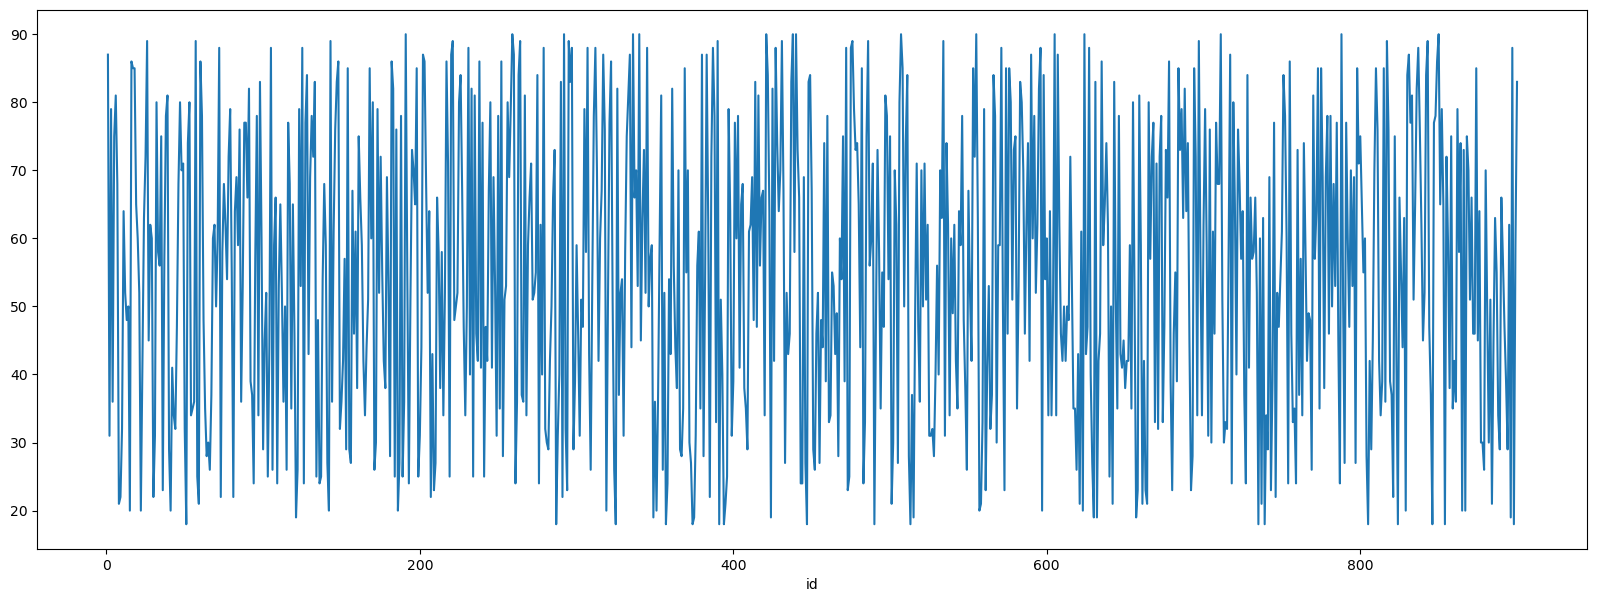

In [10]:
### Représentation par défaut en mode ligne à éviter (!!!) dans ce cas:
#  des surfaces sans sens
age.plot(figsize=(20,7))

<Axes: xlabel='id'>

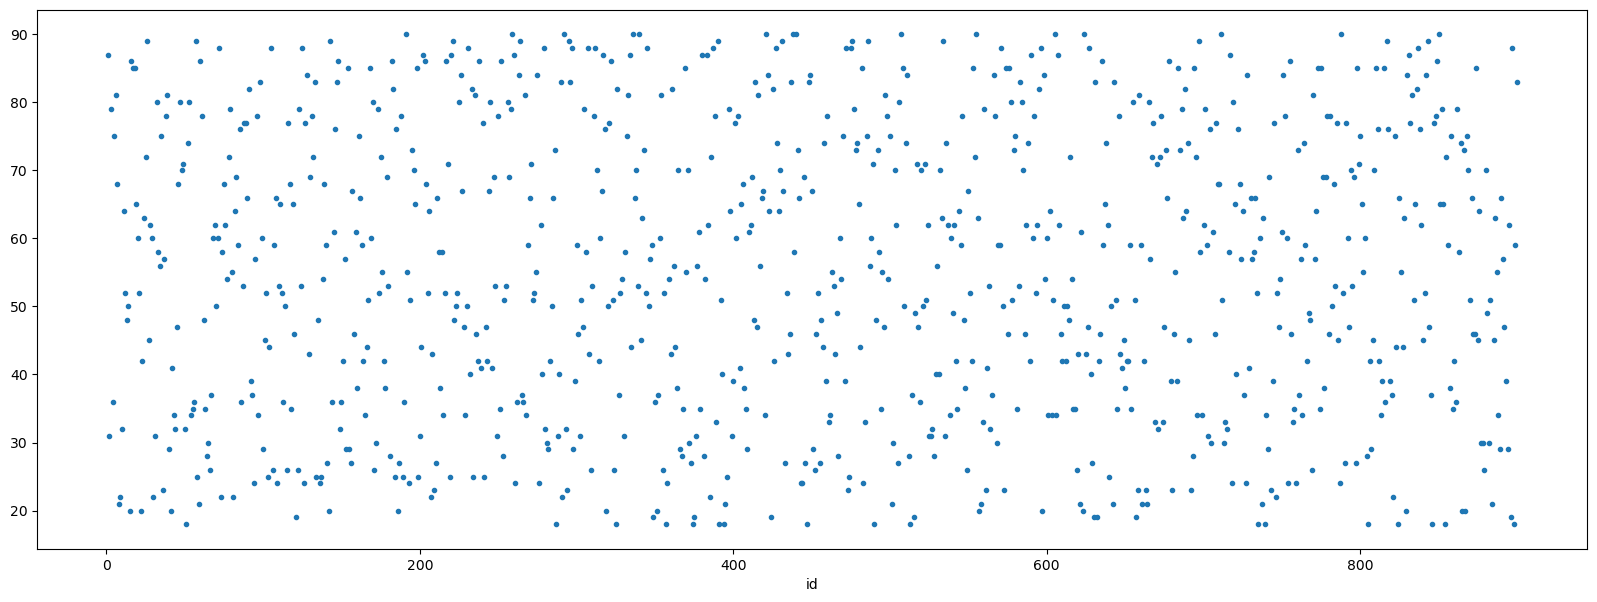

In [11]:
### Les individus en abscisses avec leur age en ordonnées:
#  type de représentation à éviter (!) dans ce cas
age.plot(style='.',figsize=(20,7))

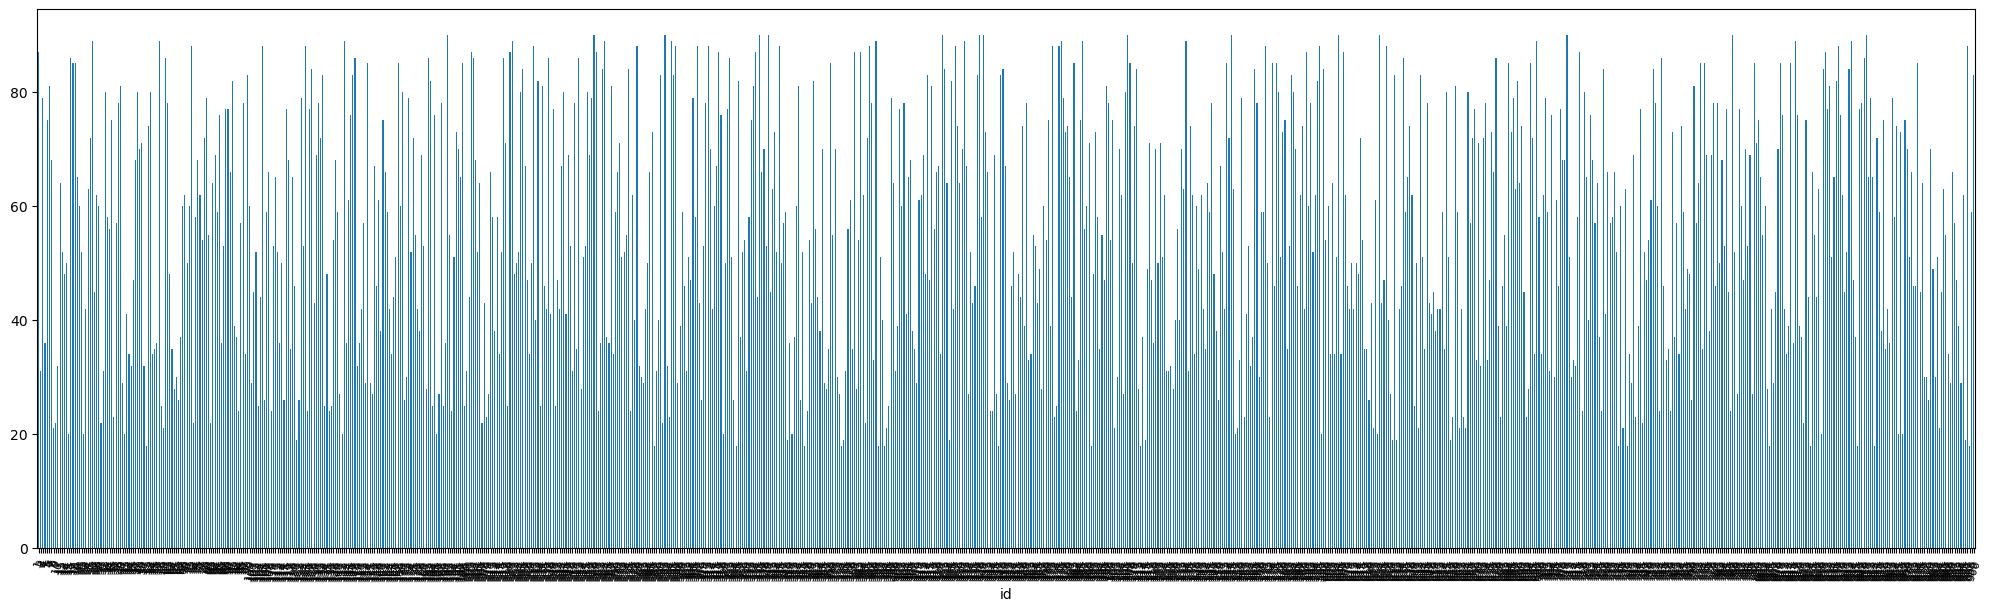

In [12]:
### Avec le diagramme à barres on a une 'image' plus parlante
# de l'age des individus mais illisible sans tri — il s'agira donc de trier
ax = age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

In [13]:
### Tri ascendant des valeurs
#  Pour le tri déscendant, 
#  mettre en argument de la fonction sort_values: ascending=False
s_age = age.sort_values() 
s_age.head()

id
490    18
739    18
735    18
805    18
357    18
Name: age, dtype: int64

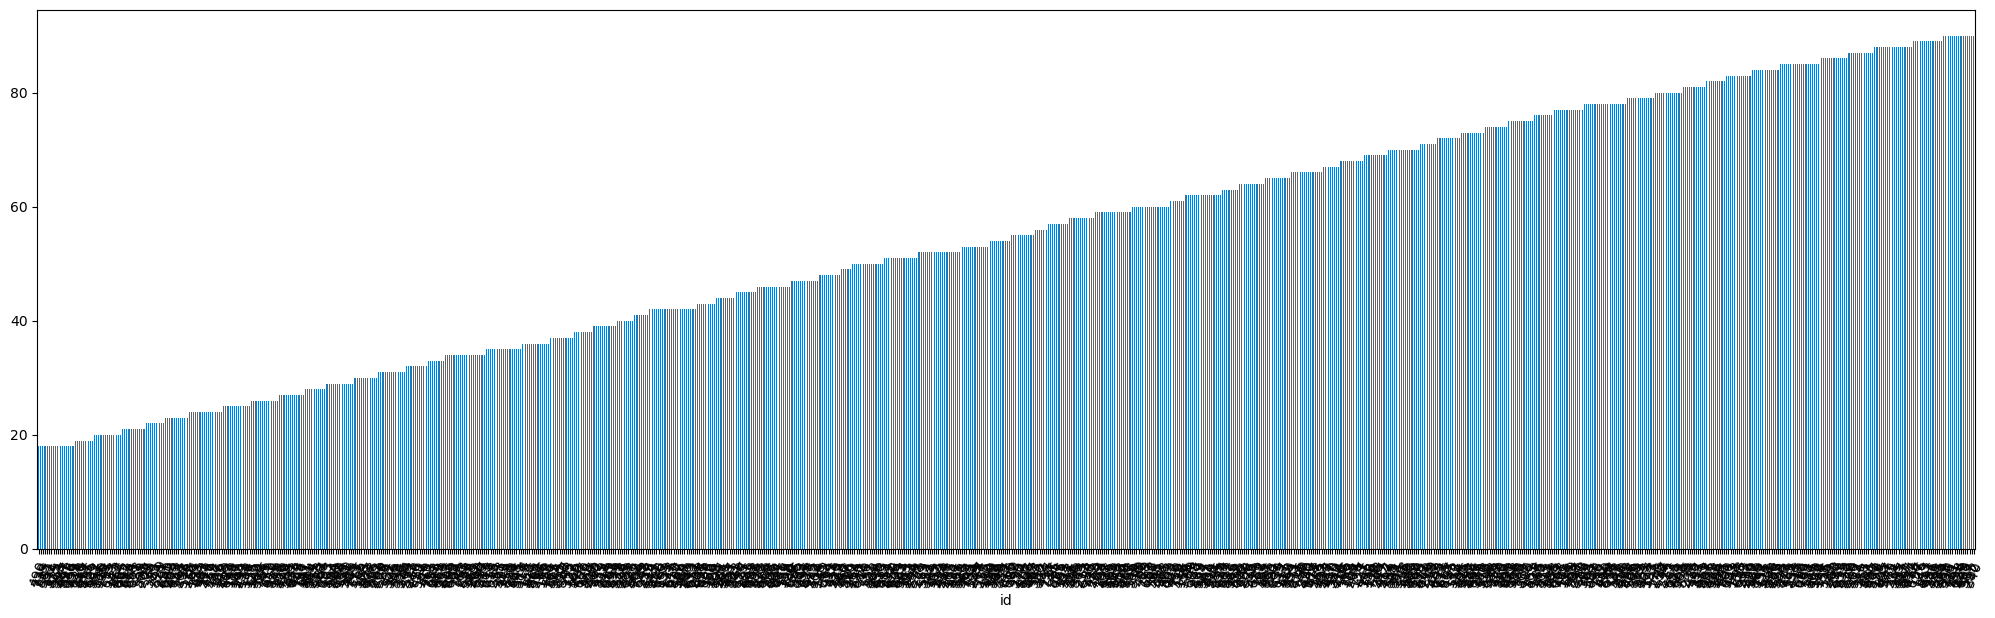

In [14]:
### Cette visualisation donne une impression de la croissance des âges
x = s_age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

### Effectifs par valeur

Âge est traité comme variable quantitative discrète. C'est un cas limite car, étant donné la quantité de valeurs différentes, on pourrait aussi établir des classes et traiter l'âge comme variable quantitative continue.

À noter également que renseigner l'âge en années revient à créer des classes, les _années_ étant dans les _classes_ de valeurs, car l'âge peut aussi être mesurée en jours, ce qui est plus précis mais généralement moins significatif, du moins pour les naissances d'une population telle que celle-ci.



In [15]:
### Regrouper par âge et compter les individus par valeur
# Distribution par valeur de l'age !
cs_age = s_age.groupby(s_age).count()
print(type(cs_age))
cs_age.head()

<class 'pandas.core.series.Series'>


age
18    17
19     9
20    13
21    11
22     9
Name: age, dtype: int64

In [16]:
### Transformer la serie en dataFrame
df_cs_age = pd.DataFrame(cs_age)
print(type(df_cs_age))
df_cs_age.head()

<class 'pandas.core.frame.DataFrame'>


,age
age,
18,17
19,9
20,13
21,11
22,9


In [17]:
### Renommer la colonne
df_cs_age.columns=['effectif']
df_cs_age.head(), df_cs_age.index[:5]

(     effectif
 age          
 18         17
 19          9
 20         13
 21         11
 22          9,
 Int64Index([18, 19, 20, 21, 22], dtype='int64', name='age'))

In [18]:
### Ajouter les effectifs cumulés
# On ajoute à un cellule la valeur de la précédente
df_cs_age['effectif_cumule'] = df_cs_age['effectif'].cumsum()
df_cs_age.head()

,effectif,effectif_cumule
age,,
18,17,17
19,9,26
20,13,39
21,11,50
22,9,59


### Fréquence et fréquence cumulée

In [19]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_cs_age['frequence'] = (100 * df_cs_age['effectif'] \
                                   / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence
age,,,
18,17,17,1.89
19,9,26,1.00
20,13,39,1.44
21,11,50,1.22
22,9,59,1.00


In [20]:
### Ajouter la fréquence cumulée
df_cs_age['frequence_cumulee'] = (100 * df_cs_age['effectif_cumule'] \
                                / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
18,17,17,1.89,1.89
19,9,26,1.00,2.89
20,13,39,1.44,4.33
21,11,50,1.22,5.56
22,9,59,1.00,6.56


In [21]:
### Le centre de la population, partie inférieure
df_cs_age[df_cs_age['frequence_cumulee']<= 50].tail(3)

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
51,16,409,1.78,45.44
52,20,429,2.22,47.67
53,13,442,1.44,49.11


In [22]:
### Le centre de la population, partie supérieure
df_cs_age[df_cs_age['frequence_cumulee']>= 50].head(3)

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
54,10,452,1.11,50.22
55,11,463,1.22,51.44
56,6,469,0.67,52.11


### Représentations graphiques

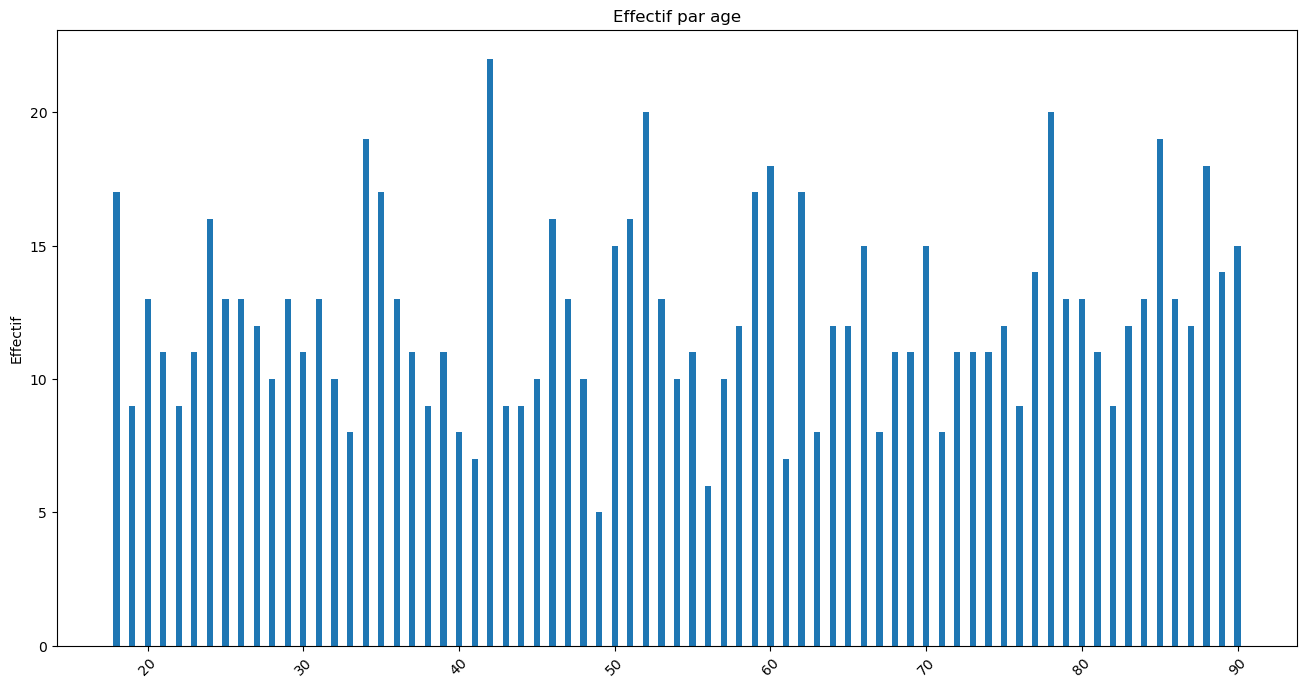

In [23]:
# Distribution des effectifs par age

objects = df_cs_age.index
eff = df_cs_age['effectif']

p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par age')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


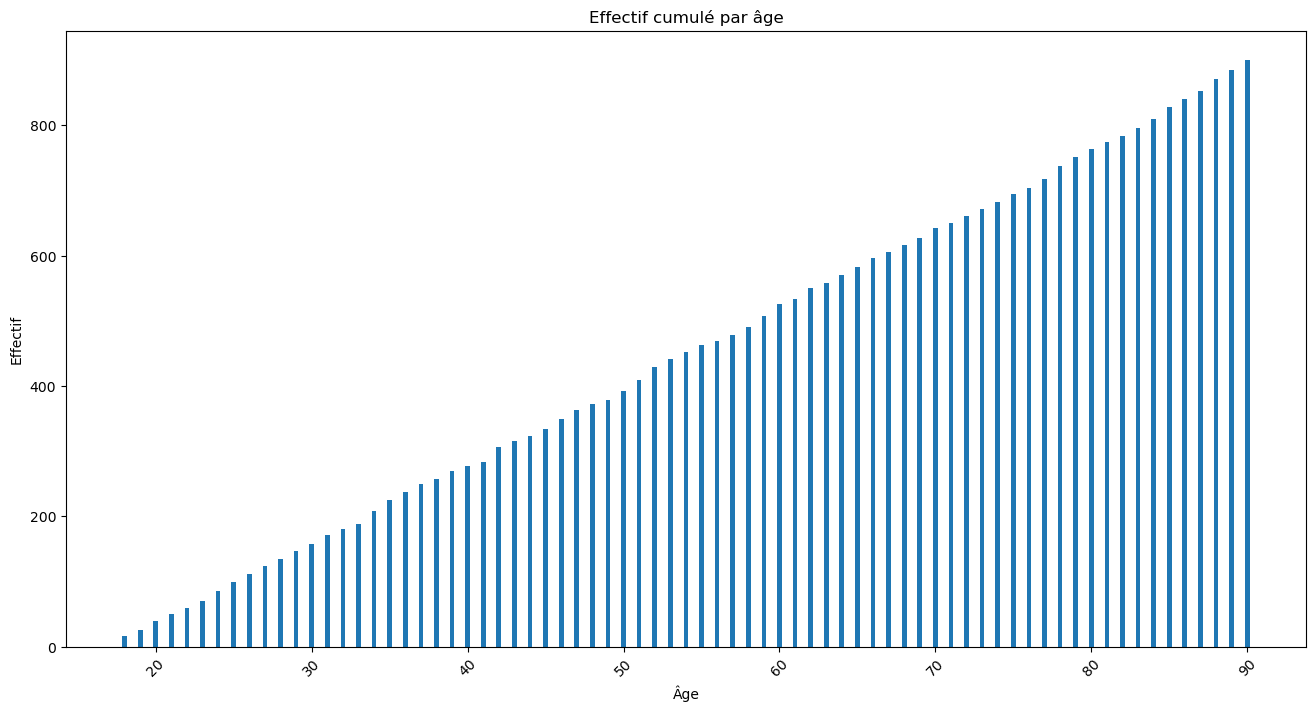

In [24]:
# Effectifs cumulés par âge

objects = df_cs_age.index
eff = df_cs_age['effectif_cumule']
#eff = df_cs_age['frequence_cumulee']



p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.xlabel('Âge')
plt.title('Effectif cumulé par âge')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


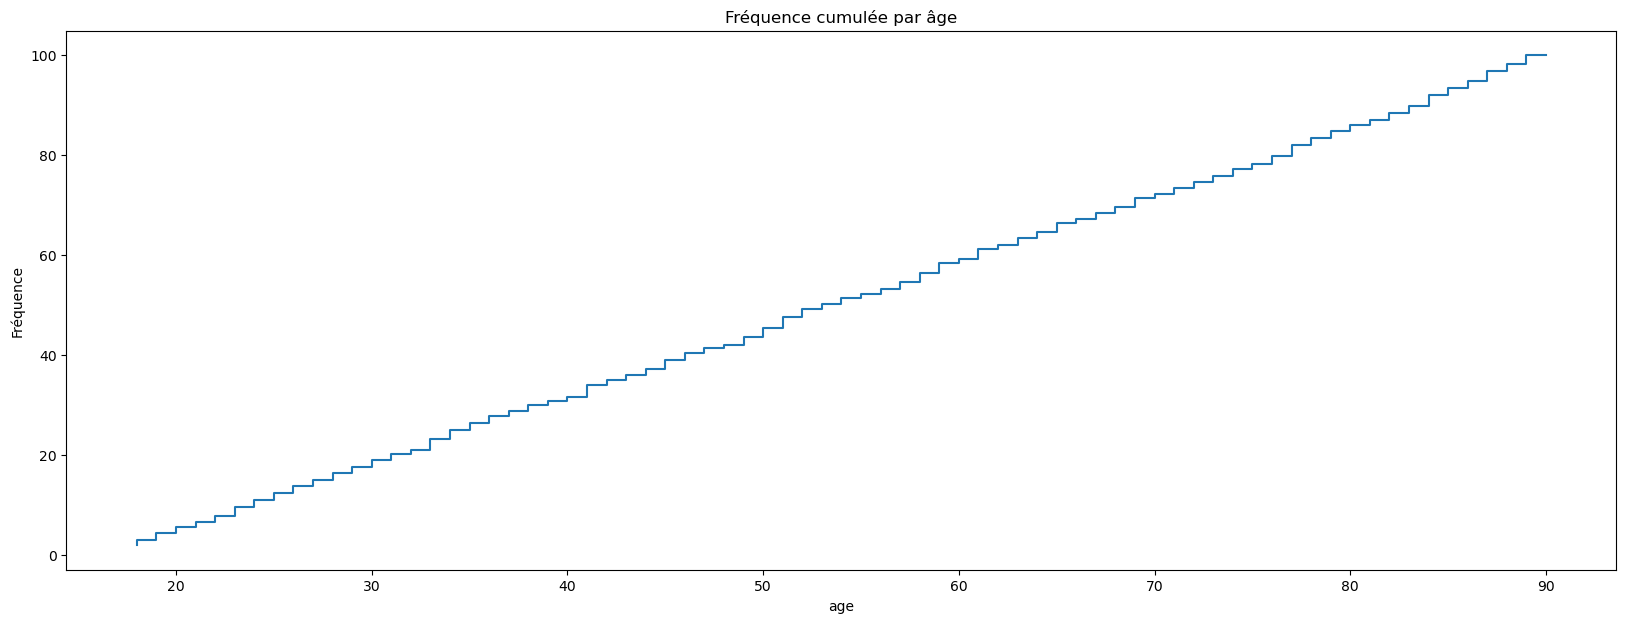

In [25]:
### Diagramme cumulatif : fréquences cumulées
#  On observe que la médiane est autour de 45 ans,
#  i.e. que la moitié de la population a moins de 45 ans, le reste plus 
plt.ylabel('Fréquence')
plt.xlabel('Âge')
plt.title('Fréquence cumulée par âge')
df_cs_age['frequence_cumulee'].plot(figsize=(20,7), drawstyle='steps') #  style='o--',
plt.draw()

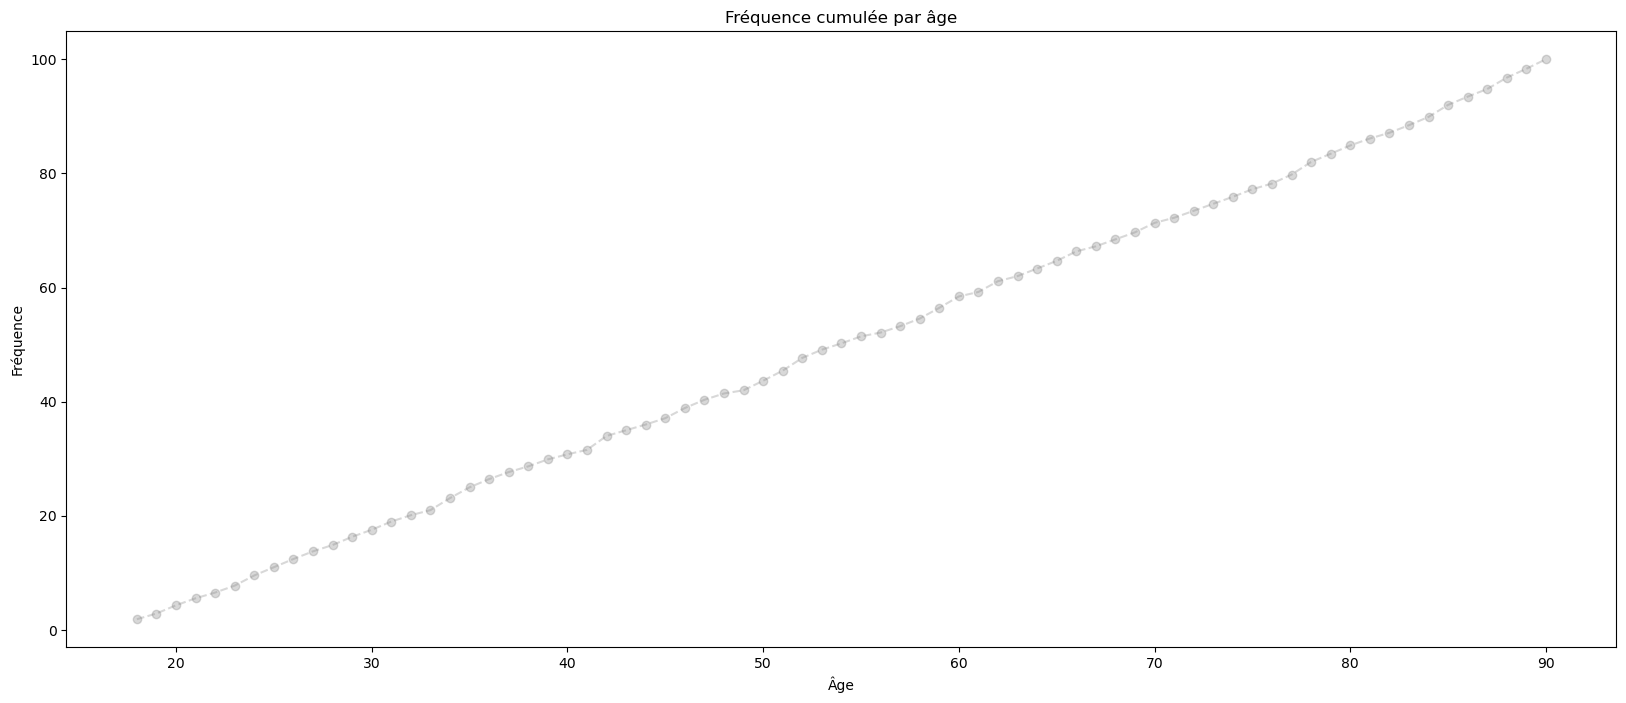

In [26]:
### Deux représentations graphiques différentes pour la même croissance.
# noter qu'à identité de données l'impression visuelle est différente
# Documentation
#   https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py
x = df_cs_age.index
y = df_cs_age['frequence_cumulee']
fig = plt.figure(figsize=[20,8])
plt.ylabel('Fréquence')
plt.xlabel('Âge')
plt.title('Fréquence cumulée par âge')
### Commenter l'une des deux lignes suivantes pour voire la différence
#plt.step(x, y, label='pre (default)')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)
plt.show()

## Paramètres de centralité et de dispersion

In [27]:
### Cette méthode d'une série fournit les caractéristiques
#  de tendance centrale et de dispersion
# À avoir toujours sous la main pour les variables quantitatives 
age.describe()

count    900.000000
mean      54.631111
std       21.465277
min       18.000000
25%       35.750000
50%       54.000000
75%       74.000000
max       90.000000
Name: age, dtype: float64

In [28]:
### La valeur la plus fréquente
age.mode()[0]

42

In [29]:
### Quel effectif a-t-elle ?
len(age[age == 74])

11

<Axes: >

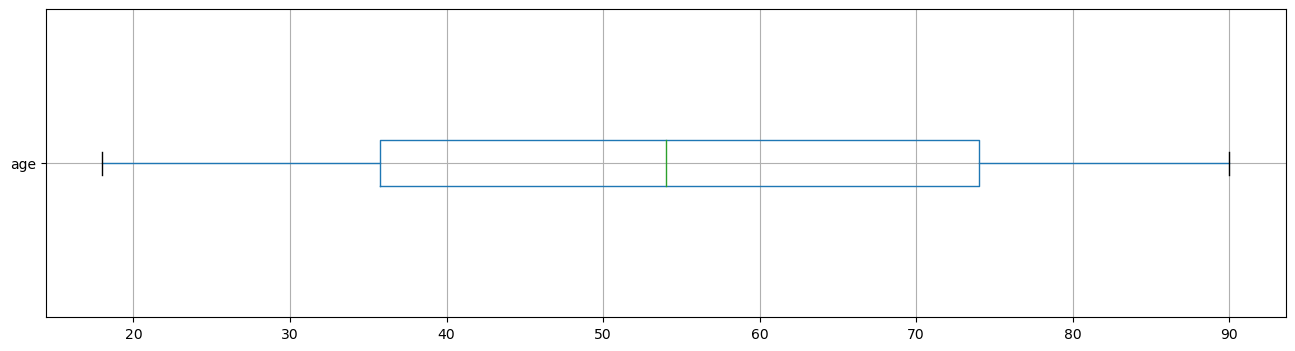

In [30]:
### Diagramme-boîte ou boîte-à-moustache pour représenter la dispersion
# Ligne centrale = la médiane. Le box est entre 1er et 3e quartile
# La moitié de la population se situe entre 31 et 68 ans
#  Noter qu'on utilise le DataFrame car cet objet dispose d'une méthode boxplot
# ce qui n'est pas le cas d'une série (pd.Series)
obs.boxplot(column=['age'], vert=False, figsize=(16,4))

In [31]:
### Calcul des valeurs extrêmes
# NB Il n'y en a parmi les valeurs de cette variable 
q1 = age.quantile(q=0.25); print(f'Première quartile: {q1}')
q2 = age.quantile(q=0.5); print(f'Médiane: {q2}')
q3 = age.quantile(q=0.75); print(f'Troisième quartile: {q3}')
print('-----')
distance_inter_quantile = q3-q1
print(f'Ecart interquartile = {distance_inter_quantile};  Multiplié par 1.5 = {distance_inter_quantile*1.5}')
print('Valeurs extrèmes:')
extr_inf = q1 - distance_inter_quantile * 1.5; print(f'Limite inférieure = {extr_inf}, valeur minimale réelle: {min(age)}')
extr_sup = q3 + distance_inter_quantile * 1.5; print(f'Limite supérieure = {extr_sup}, valeur maximale réelle: {max(age)}')

Première quartile: 35.75
Médiane: 54.0
Troisième quartile: 74.0
-----
Ecart interquartile = 38.25;  Multiplié par 1.5 = 57.375
Valeurs extrèmes:
Limite inférieure = -21.625, valeur minimale réelle: 18
Limite supérieure = 131.375, valeur maximale réelle: 90


(18.0, 90.0)

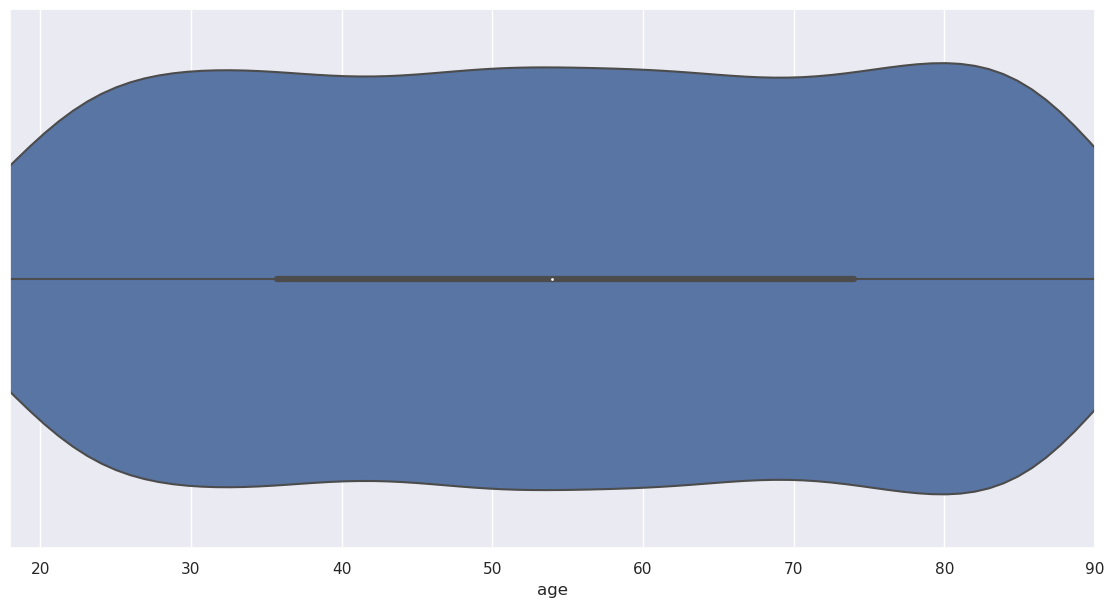

In [32]:
### Violinplot : rend visible la différente densité de la distribution
#  https://mode.com/blog/violin-plot-examples/
#  https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(14, 7)})


a = obs["age"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont coupées car postulées
ax.set_xlim(left=min(a), right=max(a))



### Histogramme

Observer les différents découpages des âges (générations) qui suivent et des effectifs respectifs:

lequel est le plus pertinent scientifiquement ?


In [33]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
c_obs = obs.copy(deep=True)

In [34]:
### Ajouter une colonne avec codage des années de naissance 
# en relation avec des classes significatives au point de vue heuristique du domaine étudié,
# modifiables en fonction de la problématique 
# Par exemple: en formation, jeunes travailleurs, travailleurs expérimentés, travailleurs seniors, préretraite, retraités
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
c_obs['generation_heur'] = pd.cut(c_obs['age'], generations, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
c_obs['generation_heur'] = c_obs['generation_heur'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,n_foyer,lecture_journal,parti,generation_heur
id,,,,,
1,87,7,deux-trois fois par semaine,populiste,66-90
2,31,4,de temps en temps,gauche,26-35
3,79,5,deux-trois fois par semaine,populiste,66-90


In [35]:
### Ajouter une colonne avec codage des années de naissance 
# en relation avec une amplitude identique des classes
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

c_obs['generation_cut'] = pd.cut(c_obs['age'], 5, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses
c_obs['generation_cut'] = c_obs['generation_cut'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,n_foyer,lecture_journal,parti,generation_heur,generation_cut
id,,,,,,
1,87,7,deux-trois fois par semaine,populiste,66-90,75-89
2,31,4,de temps en temps,gauche,26-35,18-31
3,79,5,deux-trois fois par semaine,populiste,66-90,75-89


In [36]:
### Ajouter une colonne avec codage des années de naissance 
# en relation de classes avec effectifs identiques ou proches
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

c_obs['generation_qcut'] = pd.qcut(c_obs['age'], 5)  
 
### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses
c_obs['generation_qcut'] = c_obs['generation_qcut'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,n_foyer,lecture_journal,parti,generation_heur,generation_cut,generation_qcut
id,,,,,,,
1,87,7,deux-trois fois par semaine,populiste,66-90,75-89,78-89
2,31,4,de temps en temps,gauche,26-35,18-31,17-31
3,79,5,deux-trois fois par semaine,populiste,66-90,75-89,78-89


### Amplitudes et effectifs

In [37]:
### Lister les categories
c = c_obs['generation_heur'].unique(); print(c)
list(c.categories)

['66-90', '26-35', '36-45', '18-25', '56-65', '46-55']
Categories (6, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56-65' < '66-90']


['18-25', '26-35', '36-45', '46-55', '56-65', '66-90']

In [38]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Pertinent en fonction de critères de domaine liés à l'âge
gb_generation_heur = pd.DataFrame(c_obs.groupby('generation_heur').size())
gb_generation_heur.columns = ['effectif']
gb_generation_heur

,effectif
generation_heur,
18-25,99
26-35,126
36-45,109
46-55,129
56-65,119
66-90,318


In [40]:
### Lister les categories
c = c_obs['generation_cut'].unique(); print(c)
list(c.categories)

['75-89', '18-31', '32-45', '61-74', '46-60']
Categories (5, object): ['18-31' < '32-45' < '46-60' < '61-74' < '75-89']


['18-31', '32-45', '46-60', '61-74', '75-89']

In [41]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Amplitude égale mais effectifs différents: le moins significatif scientifiquement?
gb_generation_cut = pd.DataFrame(c_obs.groupby('generation_cut').size())
gb_generation_cut.columns = ['effectif']
gb_generation_cut

,effectif
generation_cut,
18-31,181
32-45,169
46-60,183
61-74,162
75-89,205


In [42]:
### Lister les categories
c = c_obs['generation_qcut'].unique(); print(c)
list(c.categories)

['78-89', '17-31', '32-46', '62-77', '47-61']
Categories (5, object): ['17-31' < '32-46' < '47-61' < '62-77' < '78-89']


['17-31', '32-46', '47-61', '62-77', '78-89']

In [43]:
### Regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
# Les effectifs sont presque identiques, l'amplitude des classes en découle
gb_generation_qcut = pd.DataFrame(c_obs.groupby('generation_qcut').size())
gb_generation_qcut.columns = ['effectif']
gb_generation_qcut

,effectif
generation_qcut,
17-31,181
32-46,182
47-61,187
62-77,188
78-89,162


## Représentation graphique: Diagramme à barres

Comparer les différents cas de figure, en utilisant alternativement l'un ou l'autre scénario de classement

In [44]:
objects = [l for l in gb_generation_heur.index]
eff = [l for l in gb_generation_heur['effectif']]
nom = 'heur'

In [45]:
objects = [l for l in gb_generation_cut.index]
eff = [l for l in gb_generation_cut['effectif']]
nom ='cut'

In [46]:
objects = [l for l in gb_generation_qcut.index]
eff = [l for l in gb_generation_qcut['effectif']]
nom = 'qcut'

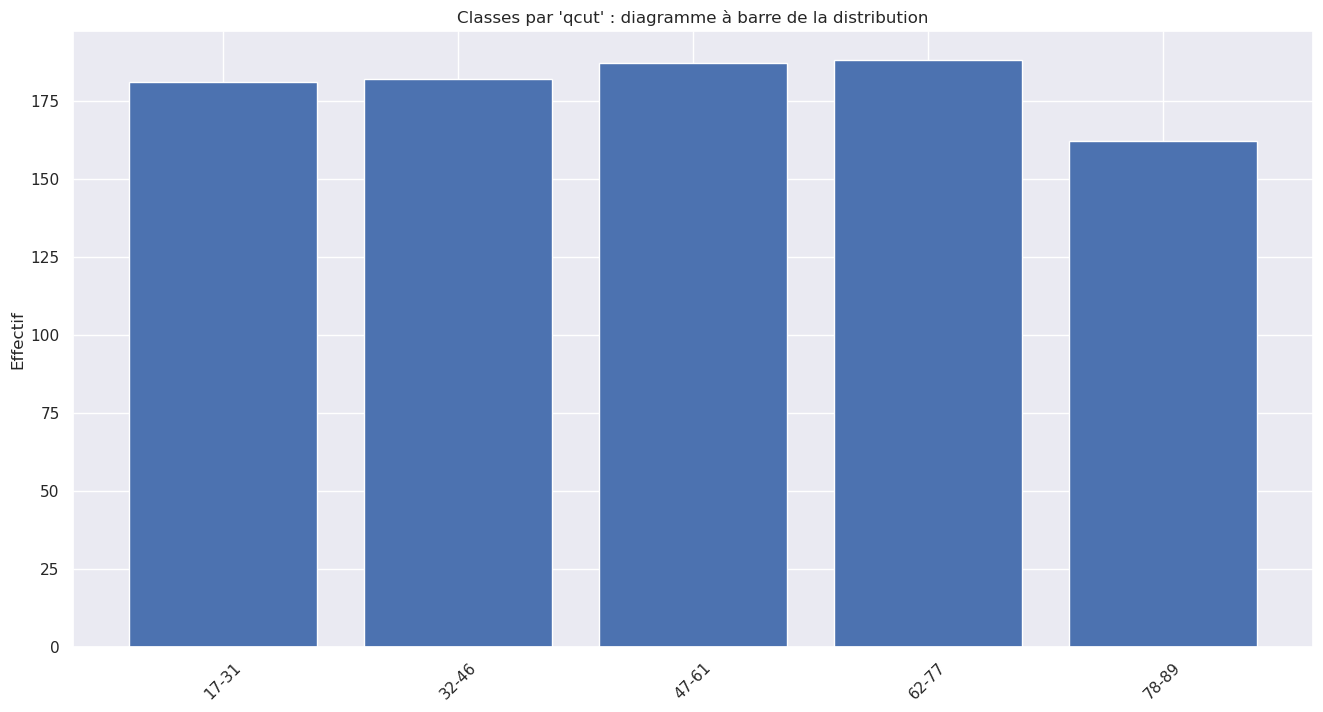

In [47]:
### Diagramme à barre, non adapté et trompeur: ce n'est pas un vrai histogramme
# Attention aux différentes étendues des ages, les densités des tranches sont différentes

p1 = plt.bar(objects, eff)

plt.ylabel('Effectif')
plt.title(f"Classes par '{nom}' : diagramme à barre de la distribution")
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


## Histogramme

<Axes: >

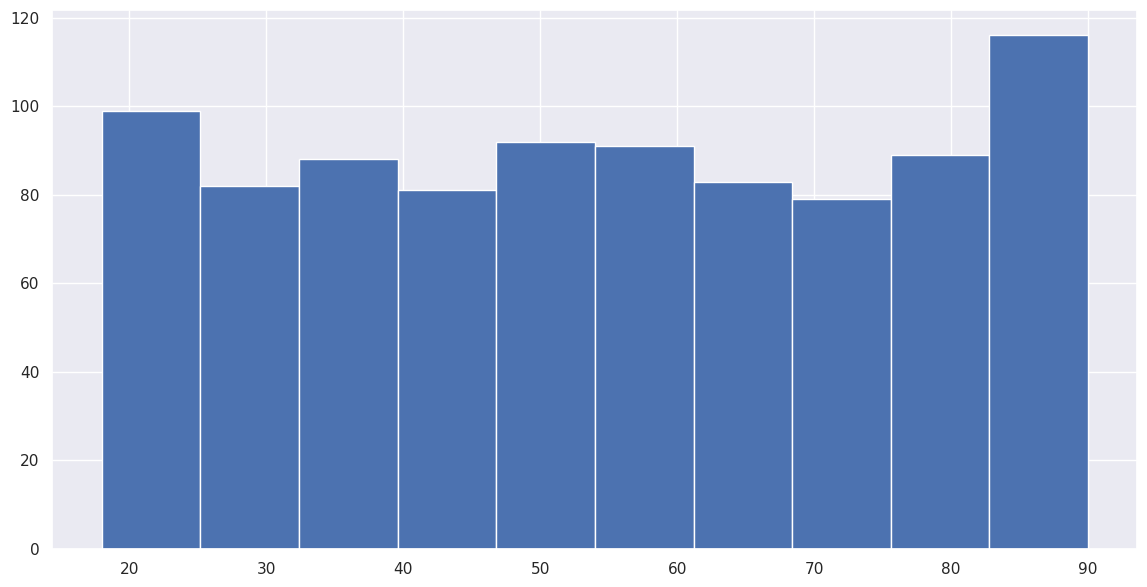

In [48]:
### Représentation automatique
# Dix classes de la même amplitude en abscisses, effectifs (!) en ordonnées

c_obs['age'].hist()

### Application aux différents découpages des générations (exemples)

In [45]:
gb_generation_heur = gb_generation_heur.reset_index()
gb_generation_heur.columns=['generation', 'effectif']
gb_generation_heur

,generation,effectif
0,18-25,18
1,26-35,22
2,36-45,26
3,46-55,14
4,56-65,11
5,66-90,39


In [46]:
gb_generation_qcut = gb_generation_qcut.reset_index()
gb_generation_qcut.columns=['generation', 'effectif']
gb_generation_qcut

,generation,effectif
0,17-28,27
1,29-38,26
2,39-54,27
3,55-72,24
4,73-89,26


In [47]:
### L'histogramme est basé sur la densité de différentes tranches
#  Cette fonction calcule la densité des tranches
def calculer_densite(ligne):
    i = ligne['generation'].split('-')
    # print(i)
    ampl = int(i[1])-int(i[0])
    # print(ampl)
    d = round(ligne['frequence']/ampl,4)
    return(d)

In [48]:
### Séparer et préparer les différentes valeurs
def preparer_valeurs(df):
    df['frequence'] = (df['effectif']/df['effectif'].sum()).round(4)
    df['densité'] = df.apply(calculer_densite, axis=1)
    df['start'] = df.apply(lambda x : int(x['generation'].split('-')[0]), axis=1)
    df['width'] = df.apply(lambda x : int(x['generation'].split('-')[1])-int(x['generation'].split('-')[0]), axis=1)
    return df

In [49]:
ndf = preparer_valeurs(gb_generation_heur)
ndf

,generation,effectif,frequence,densité,start,width
0,18-25,18,0.1385,0.0198,18,7
1,26-35,22,0.1692,0.0188,26,9
2,36-45,26,0.2000,0.0222,36,9
3,46-55,14,0.1077,0.0120,46,9
4,56-65,11,0.0846,0.0094,56,9
5,66-90,39,0.3000,0.0125,66,24


In [50]:
ndf1 = preparer_valeurs(gb_generation_qcut)
ndf1

,generation,effectif,frequence,densité,start,width
0,17-28,27,0.2077,0.0189,17,11
1,29-38,26,0.2000,0.0222,29,9
2,39-54,27,0.2077,0.0138,39,15
3,55-72,24,0.1846,0.0109,55,17
4,73-89,26,0.2000,0.0125,73,16


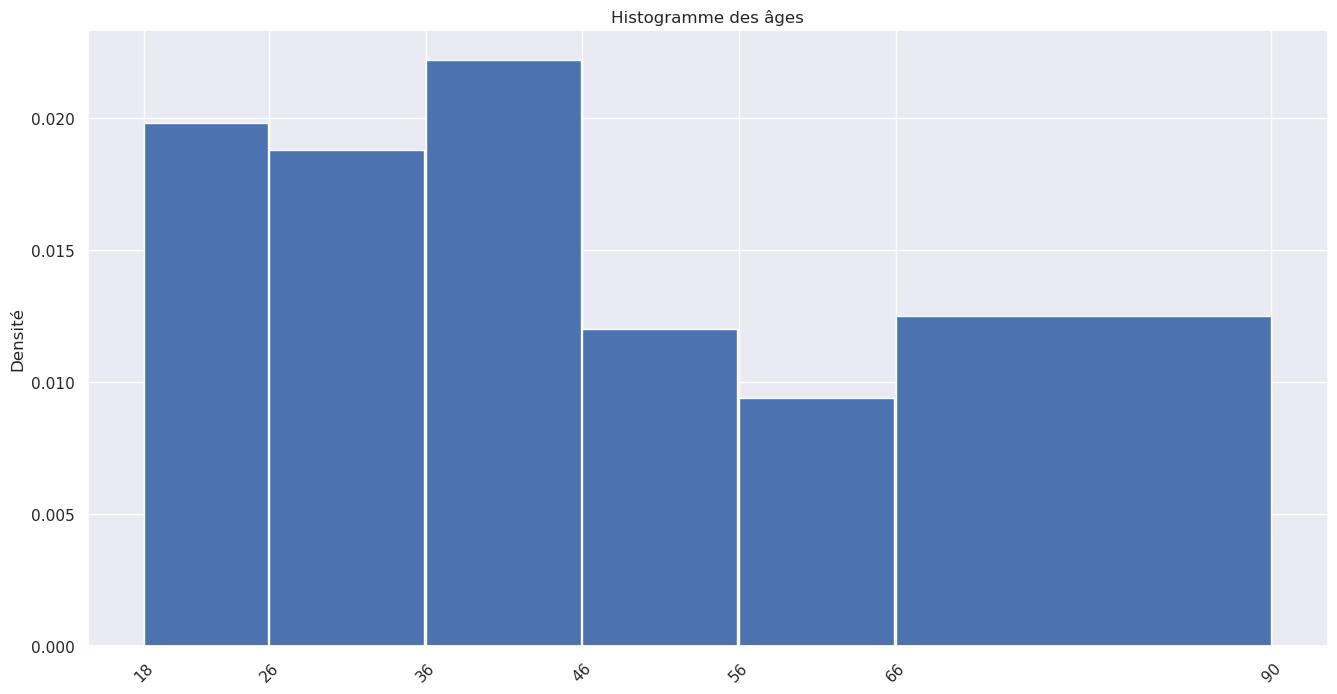

In [51]:
### Histogramme
# La hauteur des barres, en abscisses, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire: à effectif égale aire égale

## Exécuter alternativement et observer ndf et ndf1

df = ndf # ndf ndf1

fig,ax = plt.subplots(1,1)

objects = [l for l in df['start']]
eff = [l for l in df['densité']]
width = [l+0.9 if l < 10 else l for l in df['width']]

p1 = plt.bar(objects, eff, width = width, align="edge")
ax.set_xticks([18, 26, 36, 46, 56, 66, 90])
plt.ylabel('Densité')
plt.title('Histogramme des âges')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


## Distribution de probabilité normale et standardisée

* [Loi normale](https://fr.wikipedia.org/wiki/Loi_normale) (Wikpedia)
* Ci-dessous, représentation utilisant les librairies Numpy (pour produire les données) et Seaborn (pour les représenter)

### QQ Plots
"Q-Q plots are a handy tool for visually inspecting how well your data matches a known probability distribution (prob dsn). If the match is good, the data should line up more or less diagonally in the Q-Q plot. A common usage is to verify normality, i.e. how well the data matches a Normal or Gaussian dsn."
https://www.r-bloggers.com/2011/08/q-q-plots-for-multi-modal-performance-data/

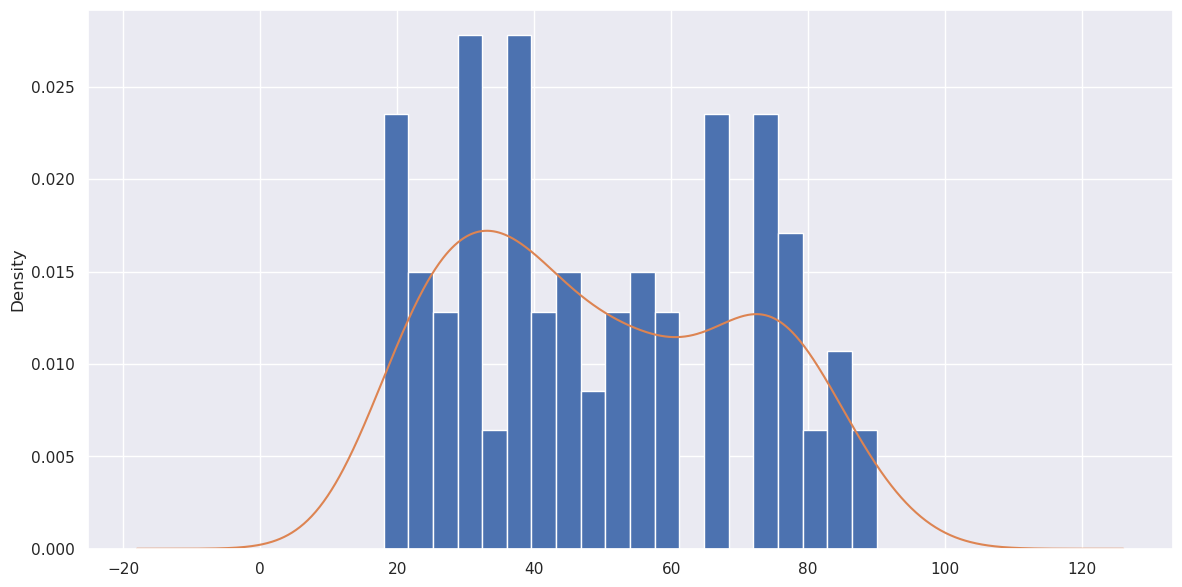

In [52]:
### Représentation automatique
# Densité !
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html
# https://stackoverflow.com/questions/25577317/pandas-histogram-in-python-possible-to-make-probability-density-instead-of-coun

c_obs['age'].plot(kind='hist', density=True, bins=20)
c_obs['age'].plot.kde()
plt.show()

In [53]:
## Ajout d'une colonne avec distribution normalisée
age = c_obs['age']

m = age.mean()
std = age.std()
print(m, std, '\n')
c_obs['age_norm'] = c_obs['age'].apply(lambda x : (x-m)/std )
c_obs.head(2)

49.55384615384615 20.757014892873435 



,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation_heur,generation_cut,generation_qcut,age_norm
id,,,,,,,,,
1,44,3,de temps en temps,droite,9660,36-45,32-45,39-54,-0.267565
2,45,1,tous les jours,droite,7364,36-45,32-45,39-54,-0.219388


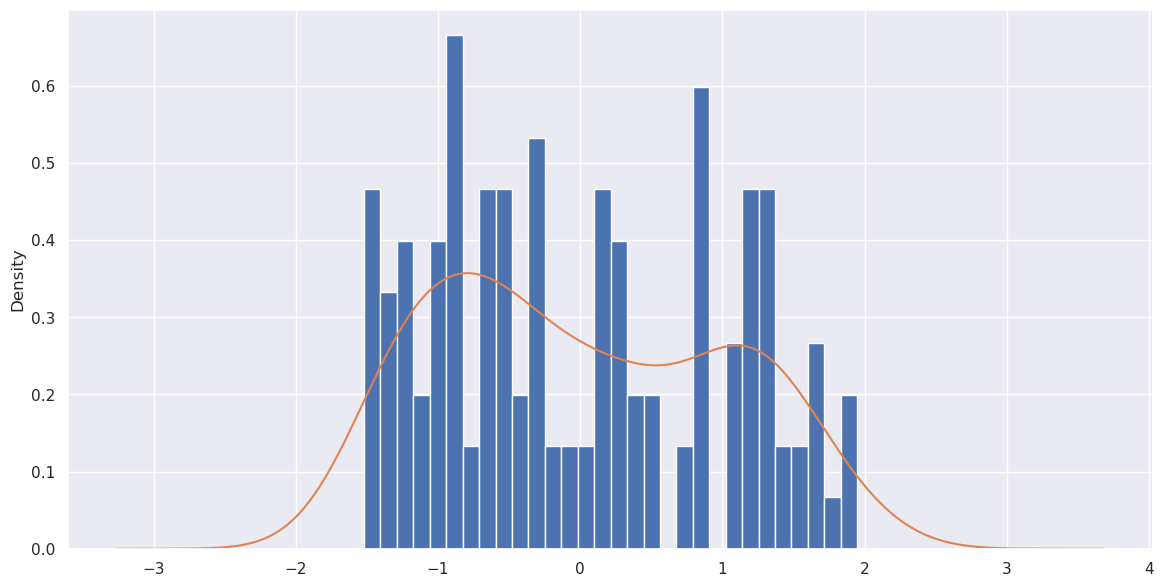

In [54]:
c_obs['age_norm'].plot(kind='hist', density=True, bins=30)
c_obs['age_norm'].plot.kde()
plt.show()

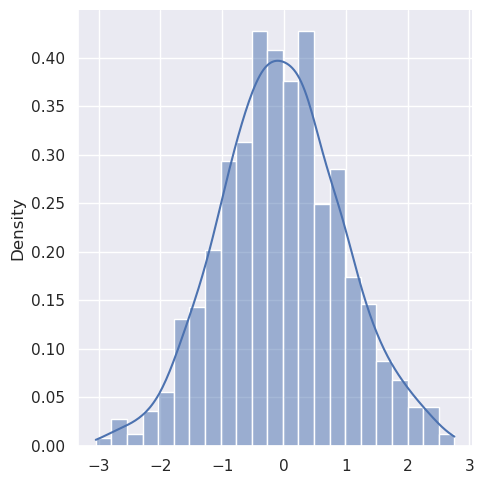

In [55]:
### Probabilité totale = aire sous la courbe = 1
# https://seaborn.pydata.org/tutorial/distributions.html
# https://www.statology.org/seaborn-normal-distribution/

np.random.seed(0)

# Crée un jeu de donnes artificiel en forme normale 
x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(x, kde=True, stat='density')

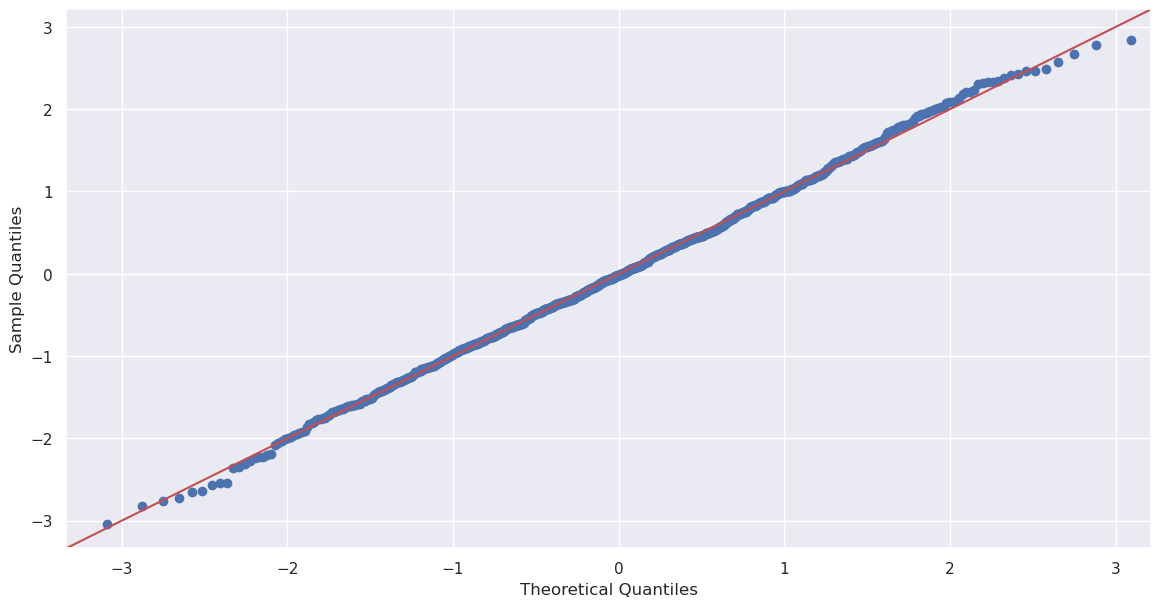

In [56]:
## QQ Plot d'une distribution normale
# https://www.statology.org/q-q-plot-python/
sm.qqplot(x, line='45', fit=True)
plt.show()

In [153]:
### Test de Shapiro-Wilk: hypothèse H0 = distribution normale
# https://www.statology.org/shapiro-wilk-test-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
stats.shapiro(x)
# Commentaire: la valeur de probabilité n'étant pas inférieure à 0.05 on ne peut par rejeteur l'H0 et donc la distribution est normale à 95% de probabilitéc

ShapiroResult(statistic=0.9985560774803162, pvalue=0.5916484594345093)

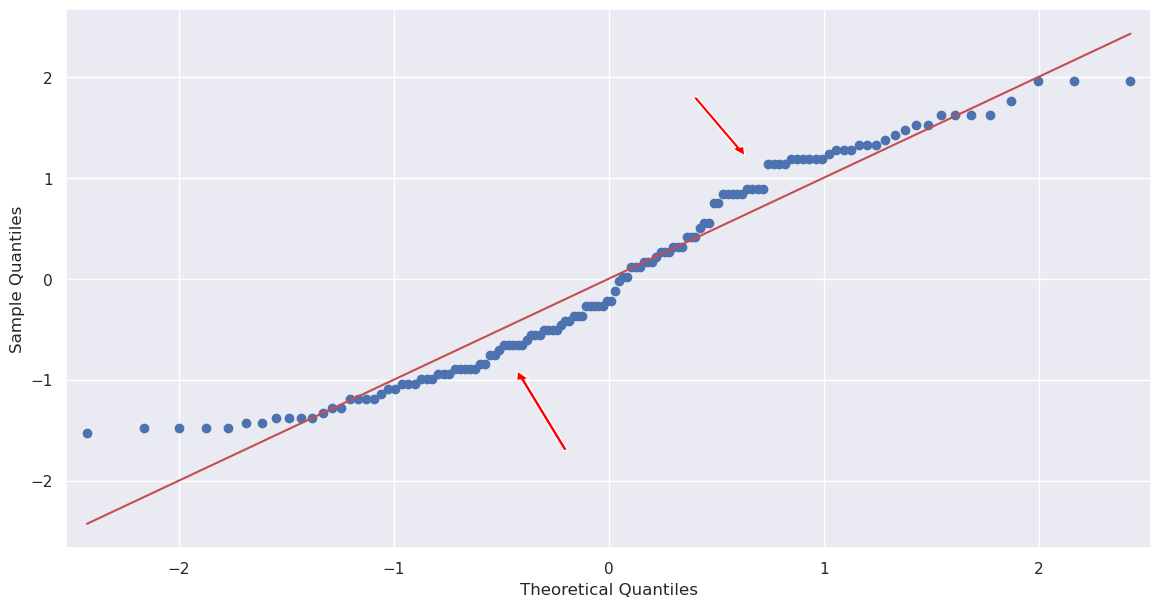

In [120]:
### QQ Plot des données concernant l'age de l'échantillon
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot
# fit = True normalise automatiquement les données
sm.qqplot(age, line='s', fit=True)
plt.arrow(x=-0.2, y=-1.7, dx=-0.2, dy=+0.7, width=.02, facecolor='red') 
plt.arrow(x=0.4, y=1.8, dx=0.2, dy=-0.5, width=.02, facecolor='red') 
plt.show()

In [154]:
### Test de Shapiro-Wilk: hypothèse H0 = distribution normale
sa = stats.shapiro(age)
# Commentaire: la valeur de probabilité est 0.000024199 et donc laragement inférieure à 0.05:
# on doit donc rejeteur l'H0 et considérer que la distribution ne suit pas la loi normale avec 95% de probabilité

In [72]:
from decimal import Decimal
print(f'Valeur p en décimales: {Decimal(sa.pvalue)} ({sa.statistic}, {sa.pvalue})')

Valeur p en décimales: 0.00002419909651507623493671417236328125 (0.9409083724021912, 2.4199096515076235e-05)


Cette distribution a une apparence bimodale:
* Bimodal/multimodal probability distribution: https://en.wikipedia.org/wiki/Multimodal_distribution
* https://towardsdatascience.com/understand-q-q-plot-using-simple-python-4f83d5b89f8f



## Exploration des revenus

Variable quantitative continue

On applique une méthodologie semblable à la variable précédente avec quelques différences

In [73]:
revenu = obs['revenu_mensuel']
revenu.head()

id
1    9660
2    7364
3    8947
4    6317
5    6511
Name: revenu_mensuel, dtype: int64

In [74]:
s_revenu = revenu.sort_values()
s_revenu.head()

id
37     1400
25     1500
117    2000
55     2135
124    2500
Name: revenu_mensuel, dtype: int64

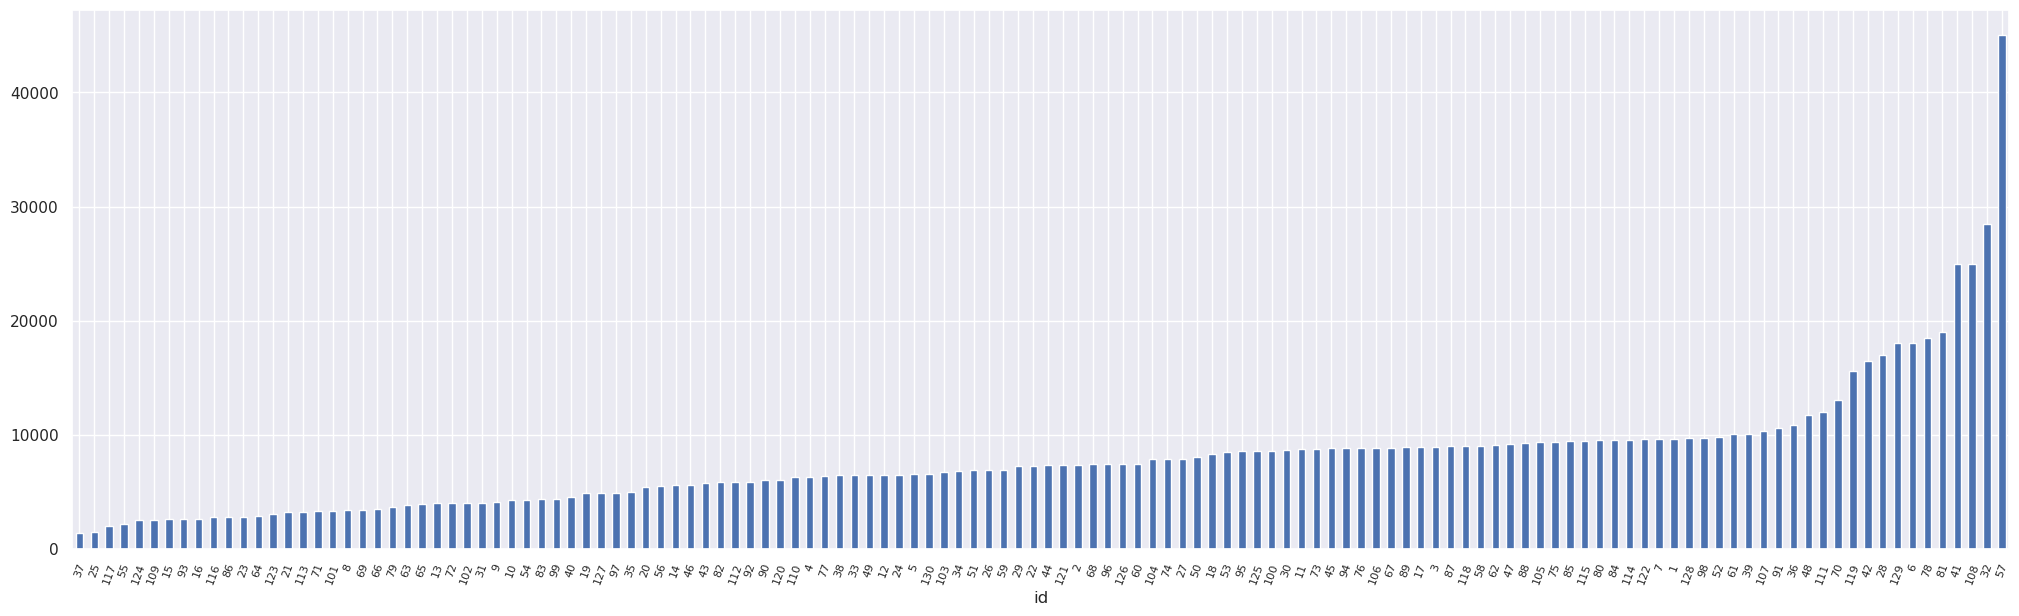

In [75]:
### Affichage ds revenus triés
ax = s_revenu.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

In [76]:
### Centralité et dispersion
revenu.describe().round(0)

count      130.0
mean      7985.0
std       5605.0
min       1400.0
25%       4399.0
50%       7276.0
75%       9236.0
max      45000.0
Name: revenu_mensuel, dtype: float64

<Axes: >

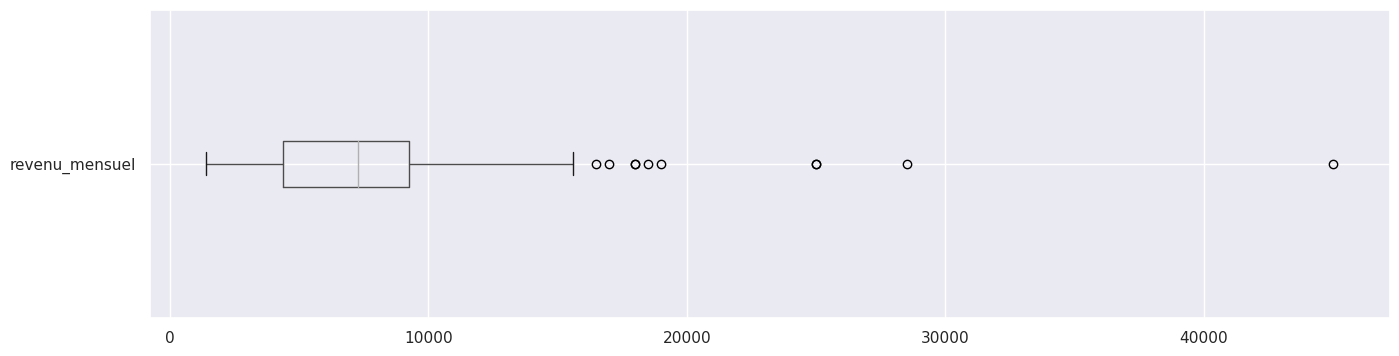

In [77]:
### Diagramme-boîte ou boîte-à-moustache pour représenter la dispersion
# Ligne centrale = la médiane. Le box est entre 1er et 3e quartile
# La moitié de la population se situe entre 31 et 68 ans
#  Noter qu'on utilise le DataFrame car cet objet dispose d'une méthode boxplot
# ce qui n'est pas le cas d'une série (pd.Series)
obs.boxplot(column=['revenu_mensuel'], vert=False, figsize=(16,4))

<Axes: >

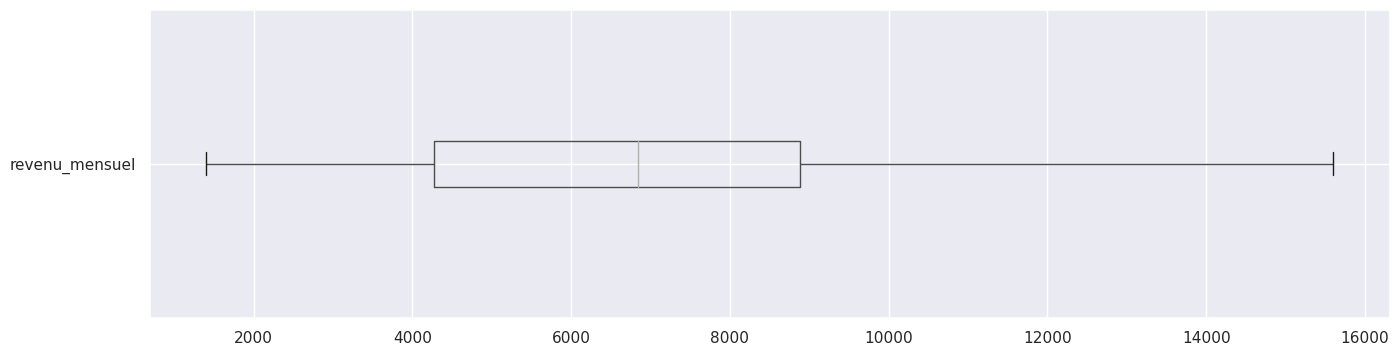

In [78]:
###Eliminer les valeurs extrèmes gâce à un filtre
obs[obs['revenu_mensuel'] < 16000].boxplot(column=['revenu_mensuel'], vert=False, figsize=(16,4))

(1400.0, 45000.0)

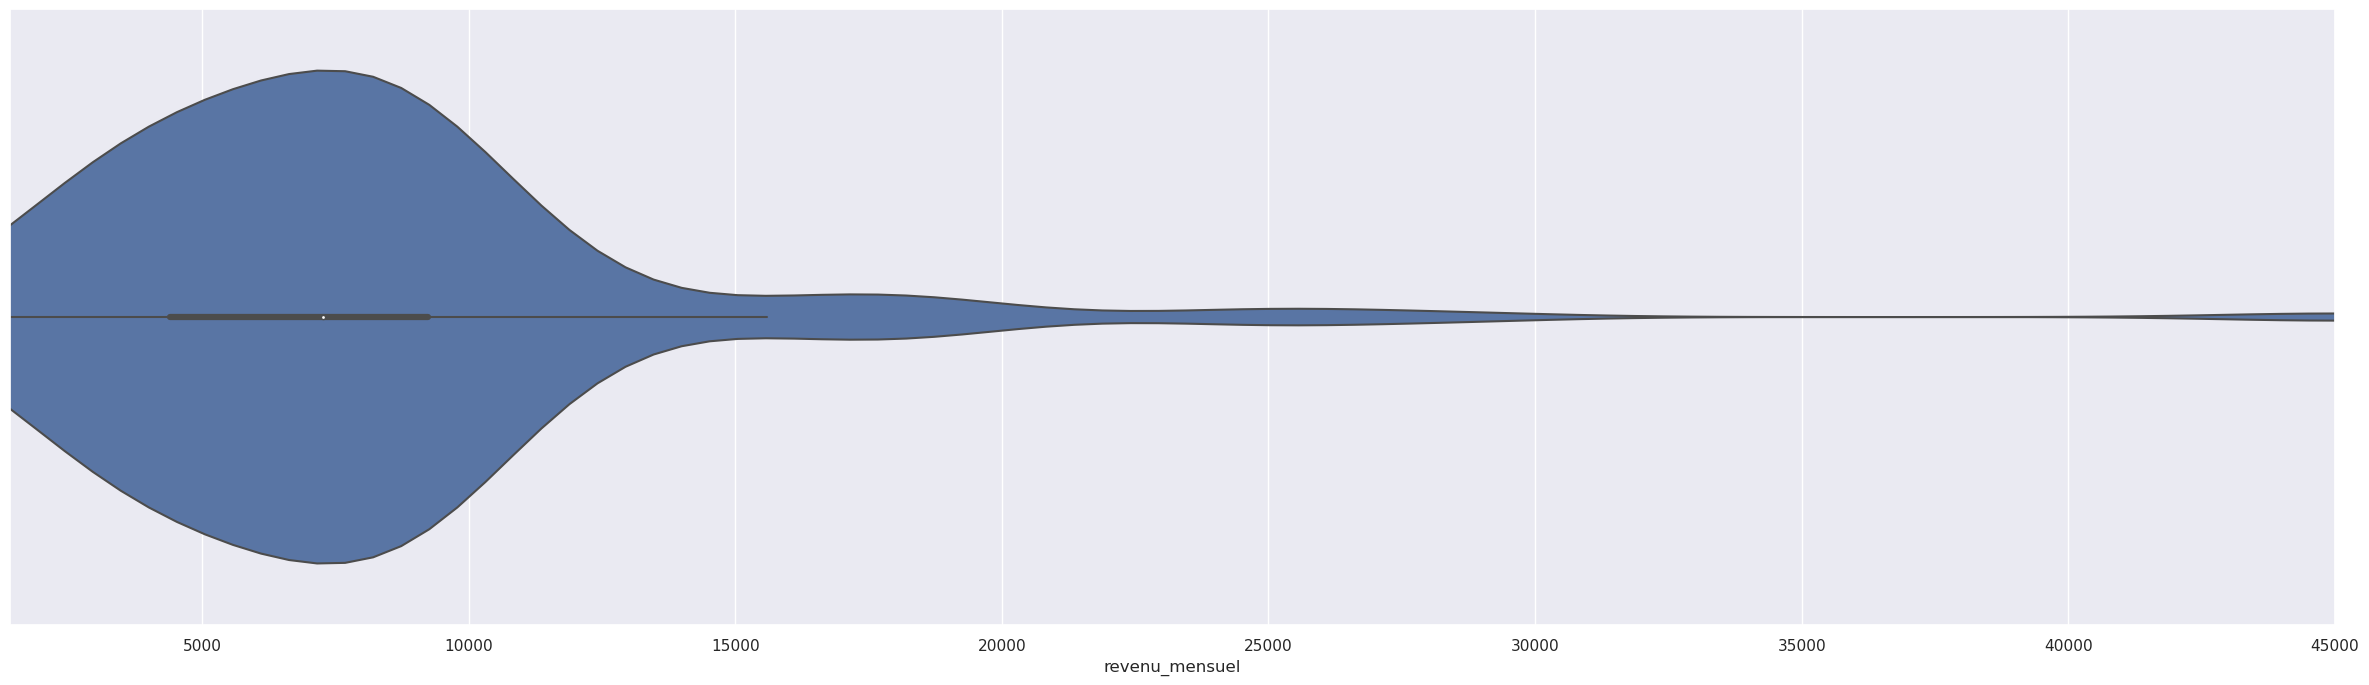

In [108]:
### Le violin plot montre bien où se situent les revenus les plus fréquents

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

a = obs["revenu_mensuel"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



(1400.0, 11728.0)

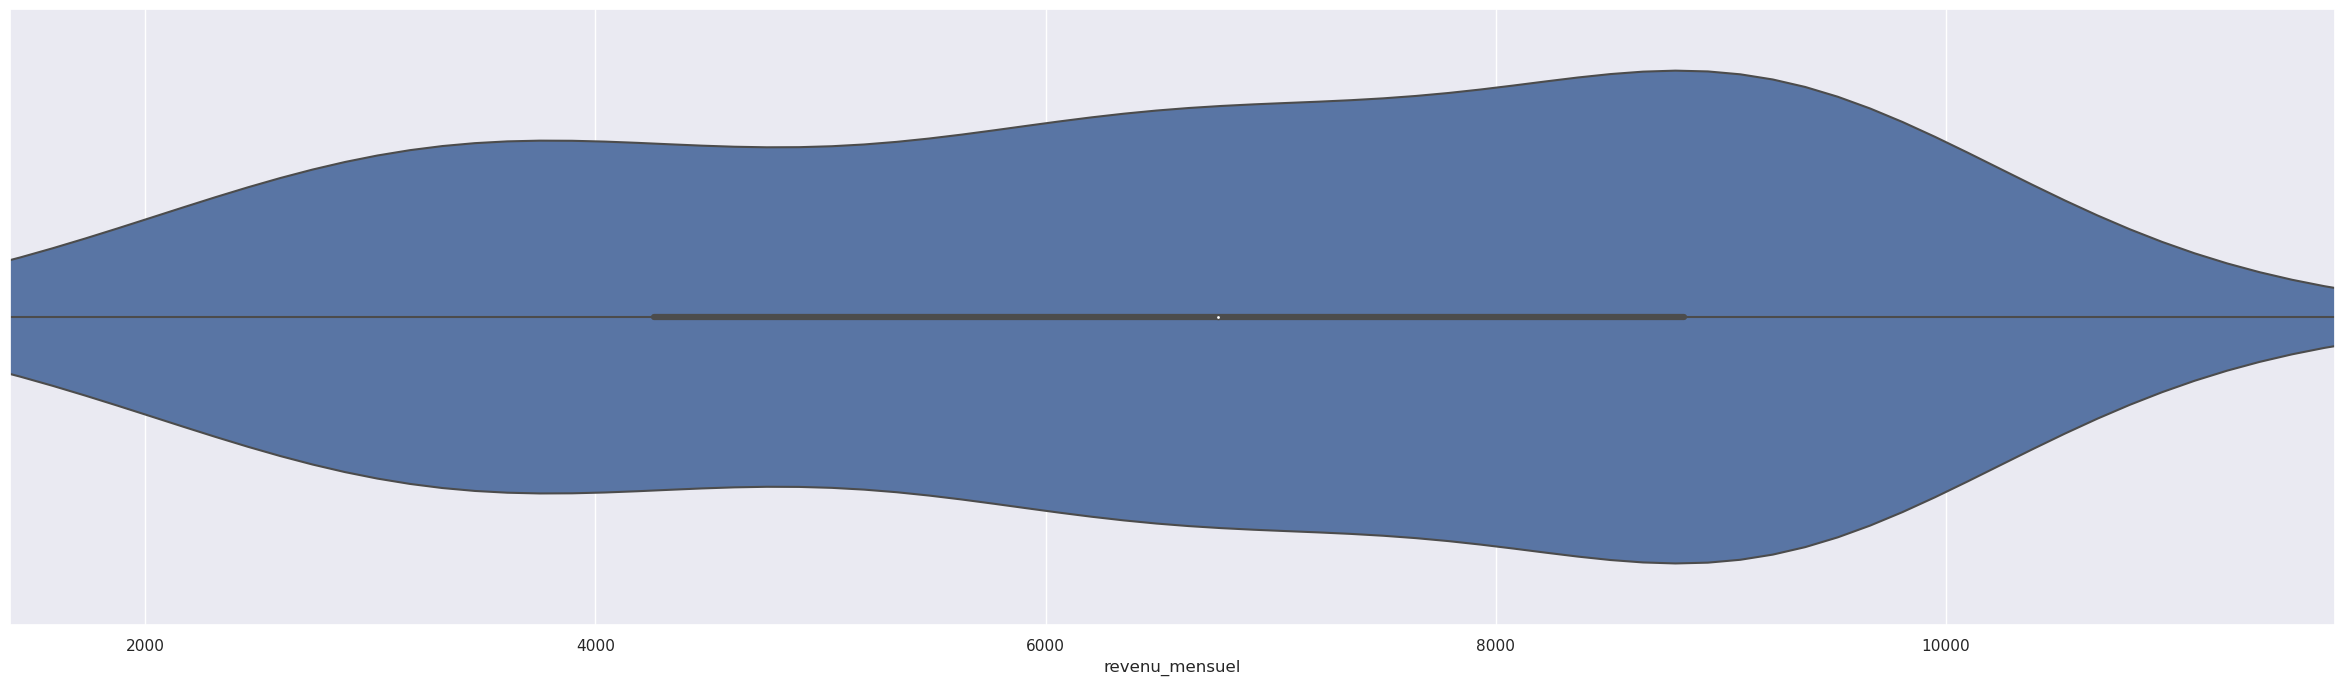

In [109]:
### Le violin plot montre bien où se situent les revenus les plus fréquents

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

a = obs[obs['revenu_mensuel'] < 12000]["revenu_mensuel"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



In [110]:
### Créer quatre classes de revenus en utilisant les quartiles
# Chaque classe contient ainsi un quart de la population
df_s_revenu = pd.DataFrame(s_revenu)
df_s_revenu['qcut'] = pd.qcut(df_s_revenu['revenu_mensuel'], 4)
df_s_revenu

,revenu_mensuel,qcut
id,,
37,1400,"(1399.999, 4399.0]"
25,1500,"(1399.999, 4399.0]"
117,2000,"(1399.999, 4399.0]"
55,2135,"(1399.999, 4399.0]"
124,2500,"(1399.999, 4399.0]"
...,...,...
81,19000,"(9236.25, 45000.0]"
41,25000,"(9236.25, 45000.0]"
108,25000,"(9236.25, 45000.0]"


In [111]:
### Regrouper par classe et ajouter le nombre d'individus
gbdf_size_revenu = df_s_revenu.groupby(by='qcut').size()
gbdf_size_revenu = gbdf_size_revenu.reset_index()
gbdf_size_revenu.columns = ['qcut', 'effectif']
gbdf_size_revenu

,qcut,effectif
0,"(1399.999, 4399.0]",33
1,"(4399.0, 7275.5]",32
2,"(7275.5, 9236.25]",32
3,"(9236.25, 45000.0]",33


In [112]:
### Ajouter la fréquence
gbdf_size_revenu['frequence_eff'] = (gbdf_size_revenu['effectif'] \
                / gbdf_size_revenu['effectif'].sum()).round(6)
gbdf_size_revenu

,qcut,effectif,frequence_eff
0,"(1399.999, 4399.0]",33,0.253846
1,"(4399.0, 7275.5]",32,0.246154
2,"(7275.5, 9236.25]",32,0.246154
3,"(9236.25, 45000.0]",33,0.253846


In [113]:
### Regrouper par classe et ajouter la somme des salaires par classe
gbdf_sum_revenu = df_s_revenu.groupby(by='qcut').sum()
gbdf_sum_revenu = gbdf_sum_revenu.reset_index()
gbdf_sum_revenu.columns = ['qcut', 'somme']
gbdf_sum_revenu

,qcut,somme
0,"(1399.999, 4399.0]",106445
1,"(4399.0, 7275.5]",194761
2,"(7275.5, 9236.25]",268234
3,"(9236.25, 45000.0]",468575


In [114]:
### Ajouter une colonne avec la fréquence
gbdf_sum_revenu['frequence_somme'] = (gbdf_sum_revenu['somme'] \
                / gbdf_sum_revenu['somme'].sum()).round(6)
gbdf_sum_revenu

,qcut,somme,frequence_somme
0,"(1399.999, 4399.0]",106445,0.102547
1,"(4399.0, 7275.5]",194761,0.187628
2,"(7275.5, 9236.25]",268234,0.258411
3,"(9236.25, 45000.0]",468575,0.451414


In [115]:
### Ajouter la fréquence cumulée
gbdf_sum_revenu['frequence_cumulee_somme'] = gbdf_sum_revenu['frequence_somme'].cumsum()
gbdf_sum_revenu

,qcut,somme,frequence_somme,frequence_cumulee_somme
0,"(1399.999, 4399.0]",106445,0.102547,0.102547
1,"(4399.0, 7275.5]",194761,0.187628,0.290175
2,"(7275.5, 9236.25]",268234,0.258411,0.548586
3,"(9236.25, 45000.0]",468575,0.451414,1.000000


In [116]:
def calculer_densite_width(ligne, colonne_frequence):
    x = ligne['qcut']
    ampl = int(x.right) - int(x.left)
    right = int(x.right)
    left = int(x.left)
    d = round(ligne[colonne_frequence]/ampl,8)
    return([d, left, right, ampl])

In [117]:
### Fusionner les tableaux
gbdf_merged = pd.merge(gbdf_size_revenu, gbdf_sum_revenu, on='qcut')
gbdf_merged

,qcut,effectif,frequence_eff,somme,frequence_somme,frequence_cumulee_somme
0,"(1399.999, 4399.0]",33,0.253846,106445,0.102547,0.102547
1,"(4399.0, 7275.5]",32,0.246154,194761,0.187628,0.290175
2,"(7275.5, 9236.25]",32,0.246154,268234,0.258411,0.548586
3,"(9236.25, 45000.0]",33,0.253846,468575,0.451414,1.000000


In [118]:
gbdf_merged['densite_eff'] = gbdf_merged.apply(lambda x: calculer_densite_width(x, 'frequence_eff'), axis=1)
gbdf_merged

,qcut,effectif,frequence_eff,somme,frequence_somme,frequence_cumulee_somme,densite_eff
0,"(1399.999, 4399.0]",33,0.253846,106445,0.102547,0.102547,"[8.462e-05, 1399, 4399, 3000]"
1,"(4399.0, 7275.5]",32,0.246154,194761,0.187628,0.290175,"[8.559e-05, 4399, 7275, 2876]"
2,"(7275.5, 9236.25]",32,0.246154,268234,0.258411,0.548586,"[0.00012552, 7275, 9236, 1961]"
3,"(9236.25, 45000.0]",33,0.253846,468575,0.451414,1.000000,"[7.1e-06, 9236, 45000, 35764]"


In [119]:
gbdf_merged.apply(lambda x: x['densite_eff'].append(x['frequence_cumulee_somme']), axis=1)
gbdf_merged

,qcut,effectif,frequence_eff,somme,frequence_somme,frequence_cumulee_somme,densite_eff
0,"(1399.999, 4399.0]",33,0.253846,106445,0.102547,0.102547,"[8.462e-05, 1399, 4399, 3000, 0.102547]"
1,"(4399.0, 7275.5]",32,0.246154,194761,0.187628,0.290175,"[8.559e-05, 4399, 7275, 2876, 0.29017499999999..."
2,"(7275.5, 9236.25]",32,0.246154,268234,0.258411,0.548586,"[0.00012552, 7275, 9236, 1961, 0.548586]"
3,"(9236.25, 45000.0]",33,0.253846,468575,0.451414,1.000000,"[7.1e-06, 9236, 45000, 35764, 1.0]"


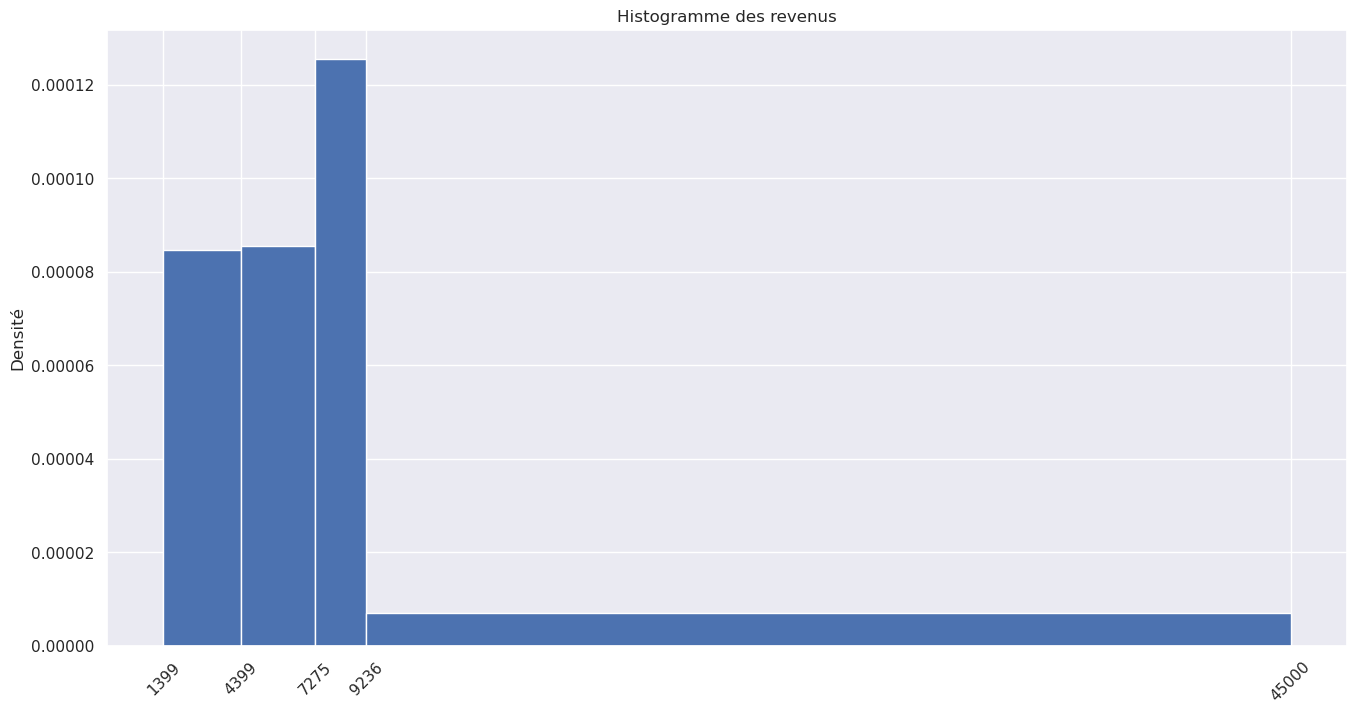

In [120]:
### Histogramme
# La hauteur des barres, en ordonnées, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire
##  Noter le nombre élevé de revenus autour de 8000 CHF, 
## en revanche peu d'individus dans la classe avec les plus haut revenus

fig,ax = plt.subplots(1,1)

objects = [l[1] for l in gbdf_merged['densite_eff']]
eff = [l[0] for l in gbdf_merged['densite_eff']]
width = [l[3]  for l in gbdf_merged['densite_eff']]


fig = plt.bar(objects, eff, width = width, align="edge")
ax.set_xticks(objects + [[l[2] for l in gbdf_merged['densite_eff']][-1]])
plt.ylabel('Densité')
plt.title('Histogramme des revenus')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

[113.  12.   3.   1.   1.]


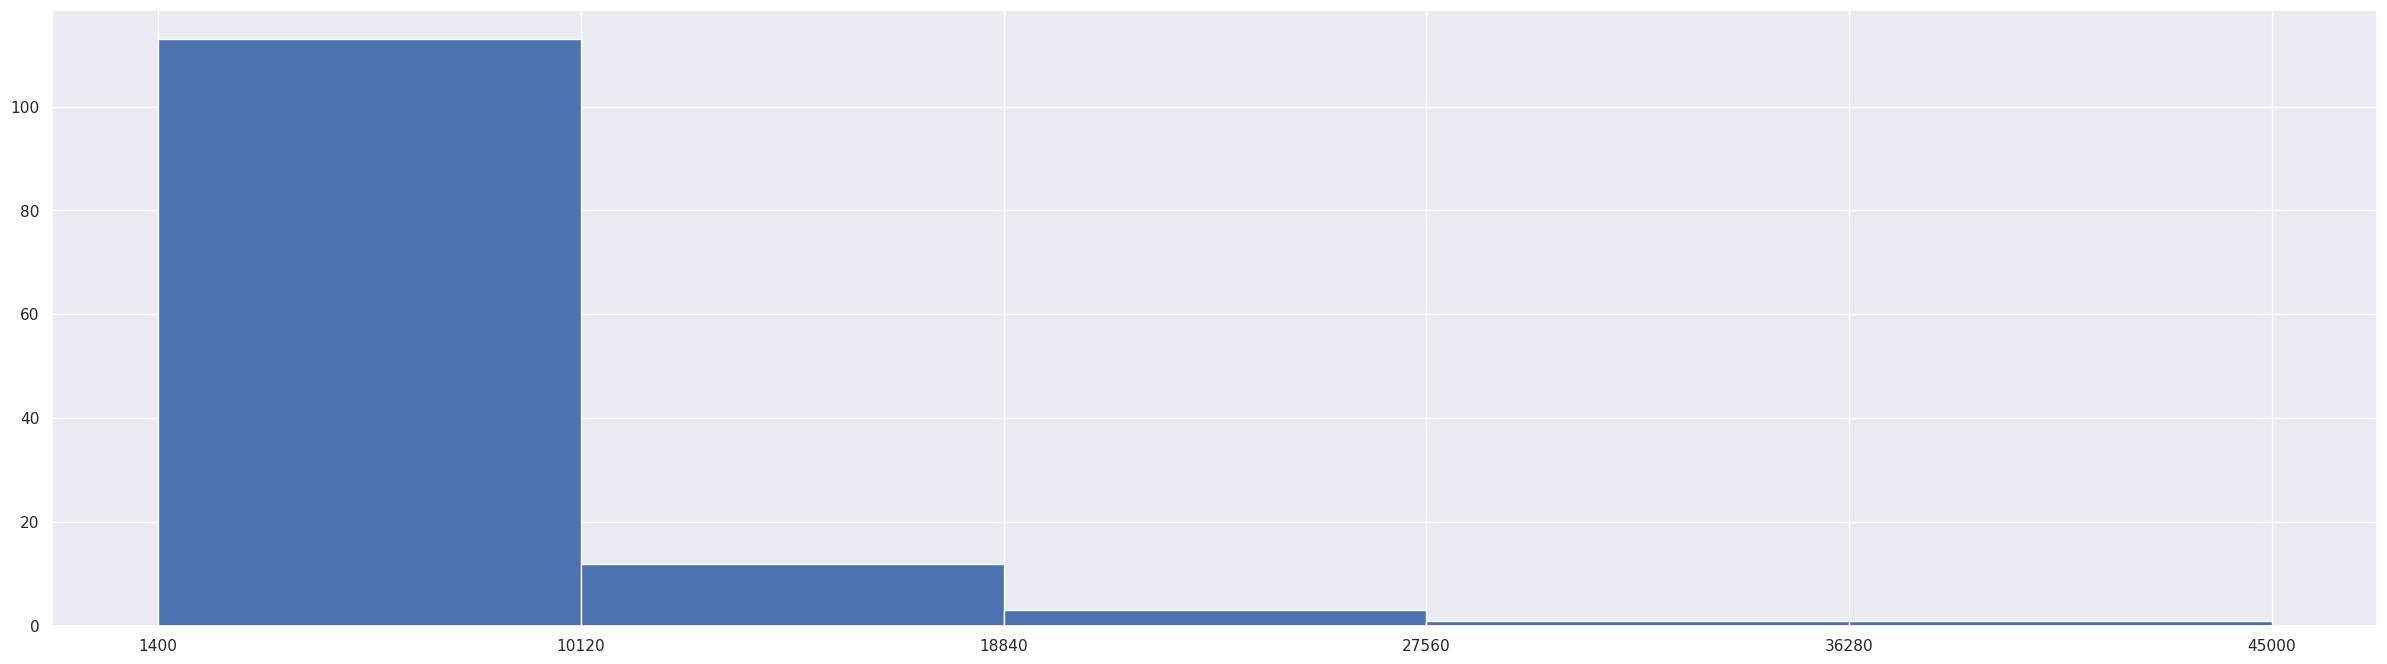

In [121]:
### Le graphique par défaut de Matplotlib, 
#  ne met pas en évidence la spécificité de la distribution,
#  i.e. le nombre élevé de revenus autour de 8000 CHF
# Ceci dépend d'un (et illustre un) découpage des classes non pertinent
n, bins, patches = plt.hist(s_revenu, bins=5, density=False)
print(n)
plt.xticks(bins)
plt.show()

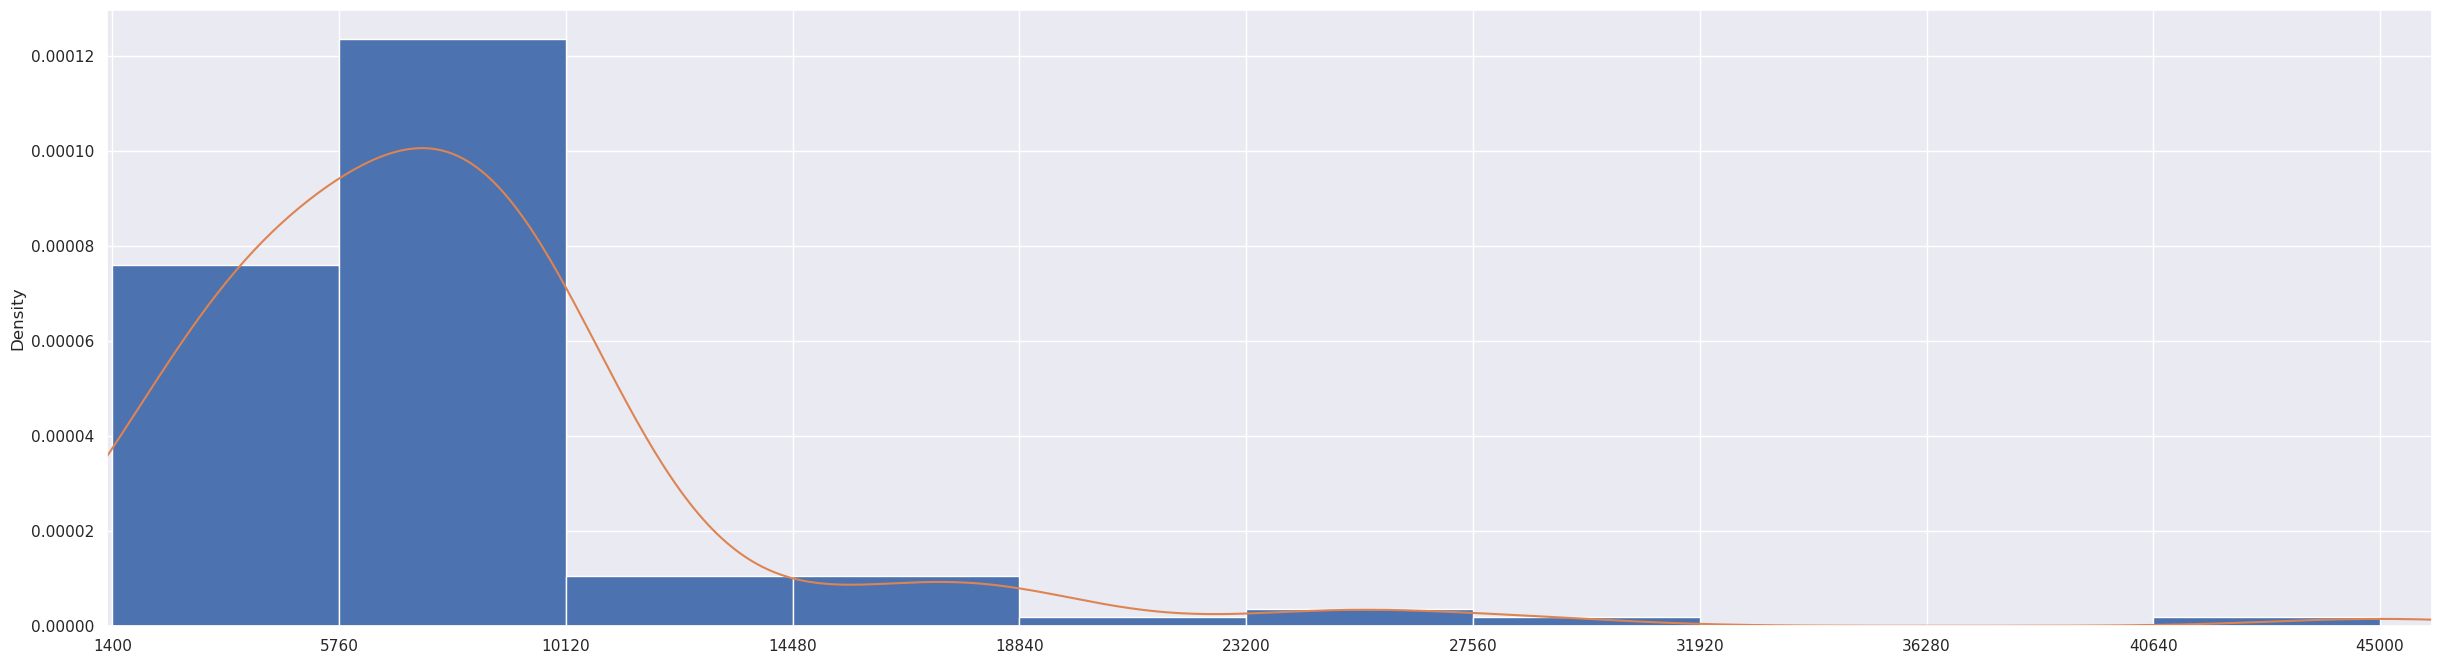

In [122]:
### Le graphique par défaut de Matplotlib, 
#  ne met pas en évidence la spécificité de la distribution,
#  i.e. le nombre élevé de revenus autour de 8000 CHF
# Ceci dépend d'un (et illustre un) découpage des classes non pertinent
n, bins, patches = plt.hist(s_revenu, density=True)
ax = s_revenu.plot.kde()

ax.set_xlim(1300, 46000)
plt.xticks(bins)
plt.show()

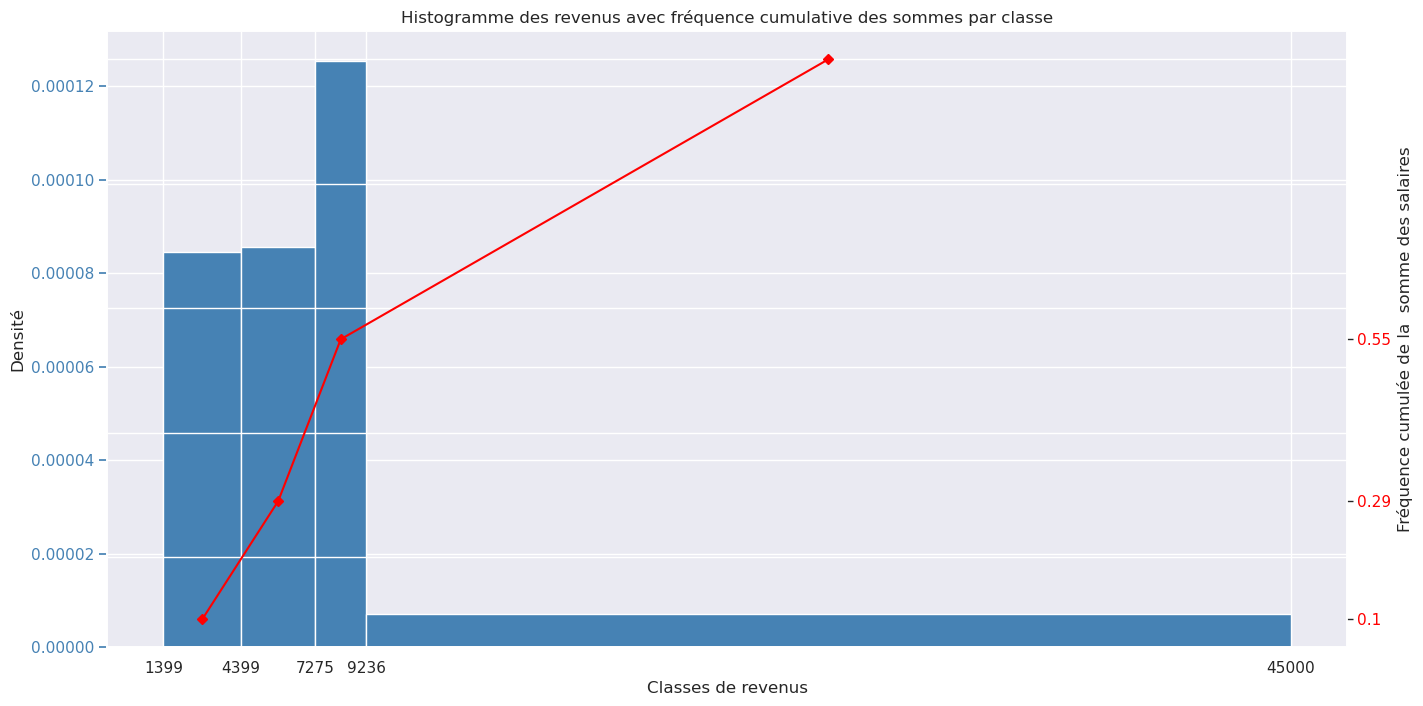

In [123]:
### Ajouter les fréquences cumulées à l'histogramme de la densité des effectifs
fig, ax = plt.subplots(1)


objects = [l[1] for l in gbdf_merged['densite_eff']]
eff = [l[0] for l in gbdf_merged['densite_eff']]
width = [l[3]  for l in gbdf_merged['densite_eff']]
valeur = [round(l[4],2) for l in gbdf_merged['densite_eff']]
ticks = [l[1] + (l[3]/2) for l in gbdf_merged['densite_eff']]



#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 5


ax.bar(objects, eff, width = width, align="edge", color=color1)
ax1 = ax.twinx()
ax1.plot(ticks,valeur, color = color2,  marker="D", ms=line_size)


ax.set_xticks(objects + [[l[2] for l in gbdf_merged['densite_eff']][-1]])

plt.title('Histogramme des revenus avec fréquence cumulative des sommes par classe')
plt.gcf().set_size_inches(16, 8)

ax.set_xlabel('Classes de revenus')
ax.set_ylabel('Densité')

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax1.tick_params(axis='y', colors='white')
ax1.set_ylabel('Fréquence cumulée de la  somme des salaires')

plt.yticks(ticks=valeur, minor=True, labels= valeur, color=color2)
plt.xticks(rotation=45)


plt.show()

### Distribution de probabilité

<class 'pandas.core.frame.DataFrame'>


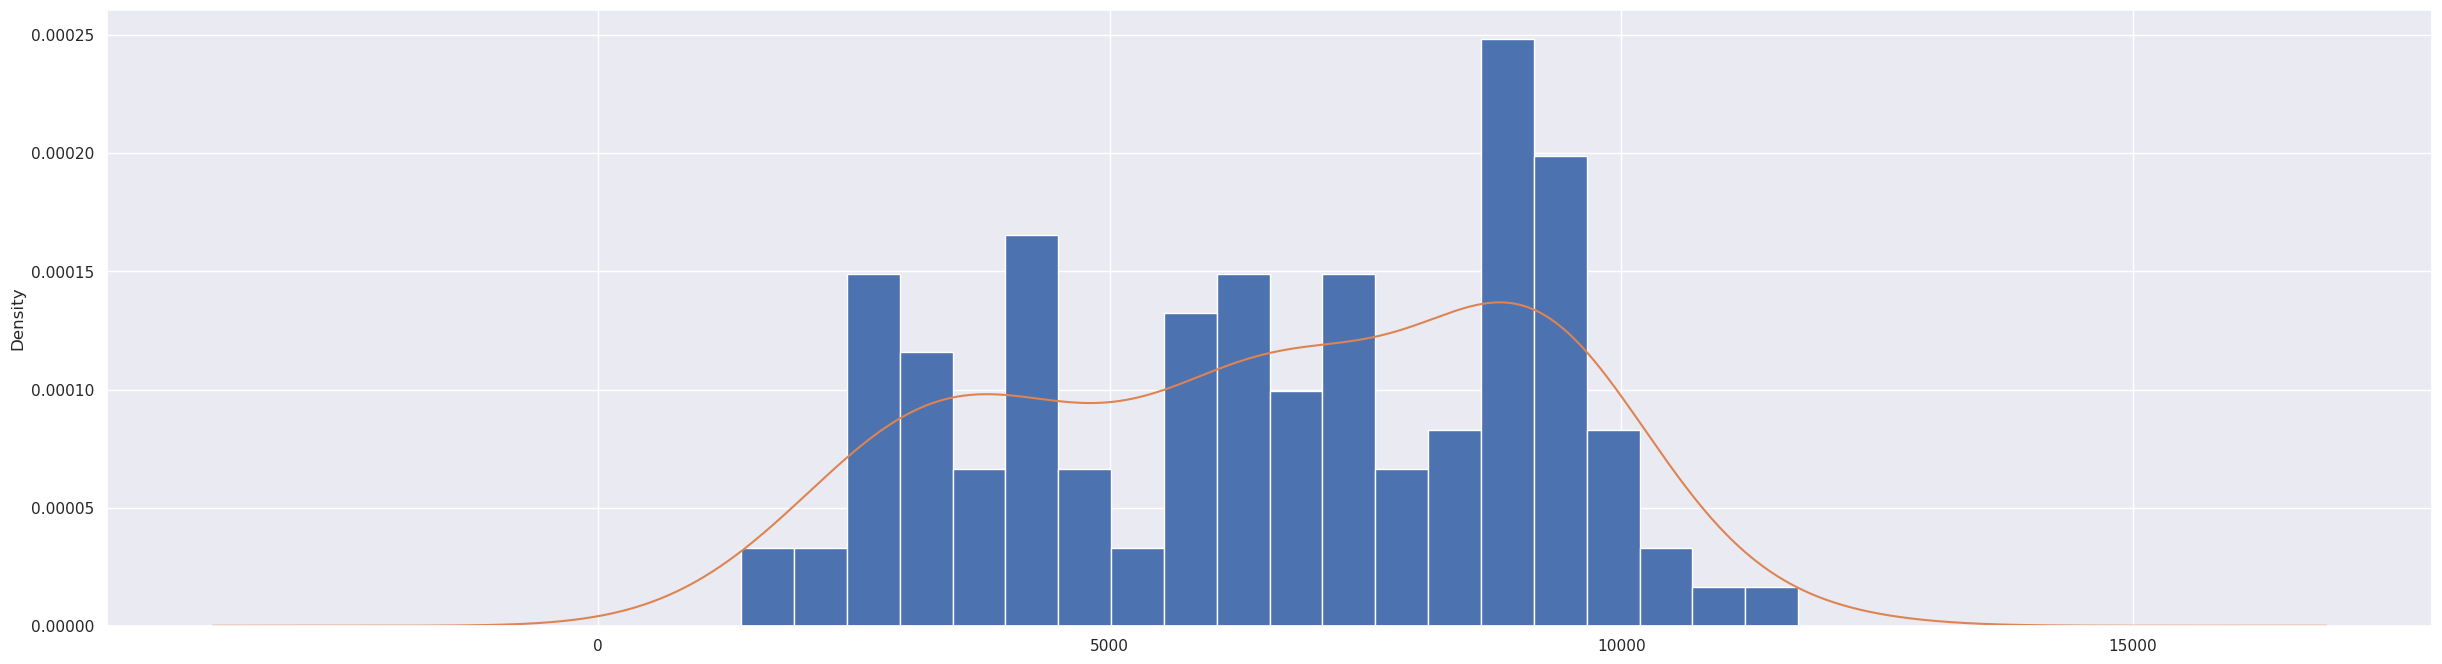

In [124]:
a = pd.DataFrame(obs[obs['revenu_mensuel'] < 12000]["revenu_mensuel"])
a.columns=['revenu']
print(type(a))
a['revenu'].plot(kind='hist', density=True, bins=20)
a['revenu'].plot.kde()
plt.show()

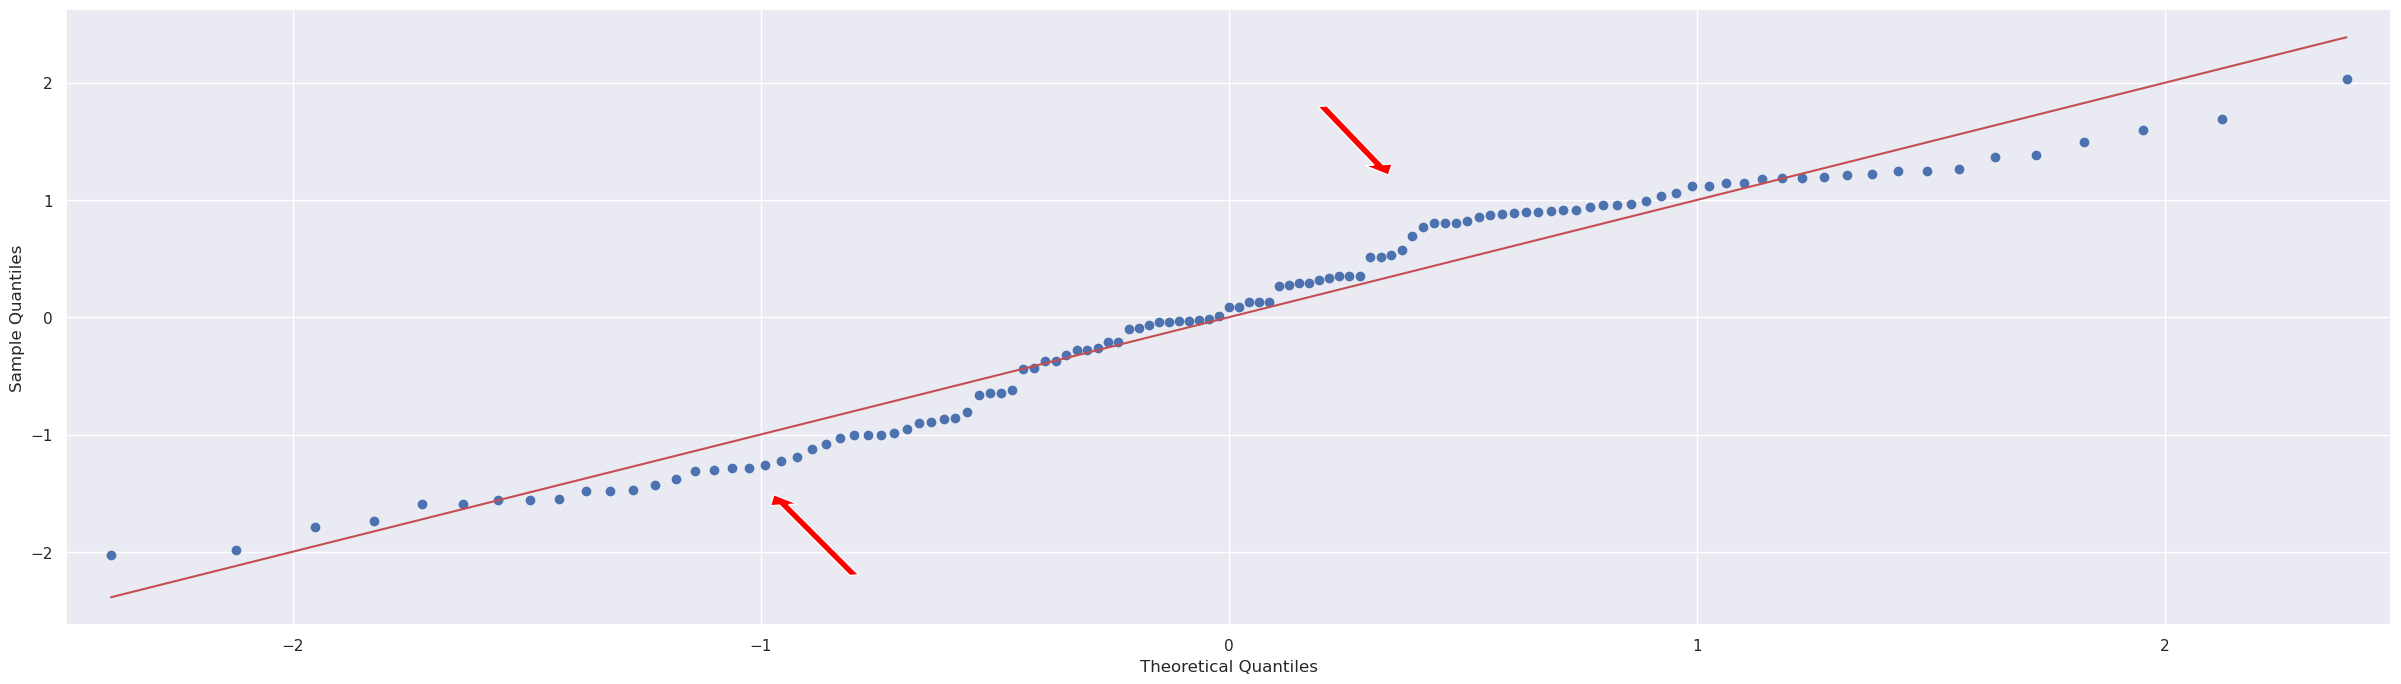

In [125]:
### QQ Plot des données concernant les revenus de l'échantillon
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot
# fit = True normalise automatiquement les données
sm.qqplot(a['revenu'], line='s', fit=True)
plt.arrow(x=-0.8, y=-2.2, dx=-0.15, dy=+0.6, width=.02, facecolor='red') 
plt.arrow(x=0.2, y=1.8, dx=0.12, dy=-0.5, width=.02, facecolor='red') 
plt.show()

### Commentaire

Noter que la distribution n'est pas normale mais multimodale, avec deux ou trois sommets, et qu'il y a des valeurs extrèmes. 
Cf. les références proposées ci-dessus au sujet de la distribution de l'âge.

On ne peut donc pas effectuer des tests paramétriques utilisant la distribution normale et que la correlation de Pearsons (cf. analyse quantitative bivariée) n'est pas appliquable à cette variable.

Comme la distribution est multimodale, l'application de transformations simples comme le logarithme naturel ne permet pas de se rapprocher de la distribution normale, comme ce serait le cas si la distribution était exponentielle.

On pourrait toutefois préciser l'analyse en découpant ultérieurement la population et en mettant en évidence les deux-trois parties à distribution normale, tout en vérifiant que ça a du sens par rapport au contexte et aux autres variables. On pourrait par exemple découper par tranches d'age.

Voir les explications de ce carnet: https://www.kaggle.com/code/iamleonie/handling-multimodal-distributions-fe-techniques

In [155]:
### Test de Shapiro-Wilk: hypothèse H0 = distribution normale
sa = stats.shapiro(a['revenu'])
print(sa)
# Commentaire: la valeur de probabilité est 0.000490 et donc laragement inférieure à 0.05:
# on doit donc rejeteur l'H0 et considérer que la distribution ne suit pas la loi normale avec 95% de probabilité

ShapiroResult(statistic=0.9536816477775574, pvalue=0.0004905336536467075)


In [140]:
print(f"{sa.pvalue:.5f}")

0.00049


## Graphique de Pareto

* [Principe de Pareto](https://fr.wikipedia.org/wiki/Principe_de_Pareto) (Wikipedia)
* [Loi de Pareto](https://fr.wikipedia.org/wiki/Loi_de_Pareto) (Wikipedia)


In [141]:
### Ajouter une colonne avec codage des revenu 
# en relation avec des effectifs identiques des classes

c_obs['revenu_mensuel_cut'] = pd.qcut(c_obs['revenu_mensuel'], 10)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses
c_obs['revenu_mensuel_cut'] = c_obs['revenu_mensuel_cut'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
c_obs.head(3)

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation_heur,generation_cut,generation_qcut,age_norm,revenu_mensuel_cut
id,,,,,,,,,,
1,44,3,de temps en temps,droite,9660,36-45,32-45,39-54,-0.267565,9576-11754
2,45,1,tous les jours,droite,7364,36-45,32-45,39-54,-0.219388,7275-8544
3,54,3,de temps en temps,droite,8947,46-55,46-60,39-54,0.214200,8902-9575


In [142]:
### Regrouper et compter par classe de salaire avec la fonction Pandas 'groupby' 
df_revenu = pd.DataFrame(c_obs.groupby('revenu_mensuel_cut').size())
df_revenu.columns = ['effectif']
df_revenu

,effectif
revenu_mensuel_cut,
1399-3032,13
3033-4009,14
4010-5449,12
5450-6447,13
6448-7274,13
7275-8544,13
8545-8901,13
8902-9575,14
9576-11754,12


In [143]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_revenu['frequence'] = (df_revenu['effectif'] \
                                   / df_revenu['effectif'].sum()).round(2)
df_revenu

,effectif,frequence
revenu_mensuel_cut,,
1399-3032,13,0.10
3033-4009,14,0.11
4010-5449,12,0.09
5450-6447,13,0.10
6448-7274,13,0.10
7275-8544,13,0.10
8545-8901,13,0.10
8902-9575,14,0.11
9576-11754,12,0.09


In [144]:
### Ajouter la fréquence cumulée
df_revenu['frequence_cumulee'] = df_revenu['frequence'].cumsum()
df_revenu.head()

,effectif,frequence,frequence_cumulee
revenu_mensuel_cut,,,
1399-3032,13,0.10,0.10
3033-4009,14,0.11,0.21
4010-5449,12,0.09,0.30
5450-6447,13,0.10,0.40
6448-7274,13,0.10,0.50


In [145]:
### Regrouper et additionner les salaires par classe 
df_somme = pd.DataFrame(c_obs.groupby('revenu_mensuel_cut')['revenu_mensuel'].sum())
df_somme.columns = ['somme']
df_somme

,somme
revenu_mensuel_cut,
1399-3032,31139
3033-4009,49877
4010-5449,55003
5450-6447,77454
6448-7274,87733
7275-8544,100174
8545-8901,113844
8902-9575,129910
9576-11754,121781


In [146]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_somme['frequence_somme'] = (df_somme['somme'] \
                                   / df_somme['somme'].sum()).round(2)
df_somme.head()

,somme,frequence_somme
revenu_mensuel_cut,,
1399-3032,31139,0.03
3033-4009,49877,0.05
4010-5449,55003,0.05
5450-6447,77454,0.07
6448-7274,87733,0.08


In [147]:
### Ajouter la fréquence cumulée
df_somme['frequence_somme_cumulee'] = df_somme['frequence_somme'].cumsum()
df_somme.head()

,somme,frequence_somme,frequence_somme_cumulee
revenu_mensuel_cut,,,
1399-3032,31139,0.03,0.03
3033-4009,49877,0.05,0.08
4010-5449,55003,0.05,0.13
5450-6447,77454,0.07,0.20
6448-7274,87733,0.08,0.28


In [148]:
df_merged = pd.merge(df_revenu, df_somme, left_index=True, right_index=True)
df_merged

,effectif,frequence,frequence_cumulee,somme,frequence_somme,frequence_somme_cumulee
revenu_mensuel_cut,,,,,,
1399-3032,13,0.10,0.10,31139,0.03,0.03
3033-4009,14,0.11,0.21,49877,0.05,0.08
4010-5449,12,0.09,0.30,55003,0.05,0.13
5450-6447,13,0.10,0.40,77454,0.07,0.20
6448-7274,13,0.10,0.50,87733,0.08,0.28
7275-8544,13,0.10,0.60,100174,0.10,0.38
8545-8901,13,0.10,0.70,113844,0.11,0.49
8902-9575,14,0.11,0.81,129910,0.13,0.62
9576-11754,12,0.09,0.90,121781,0.12,0.74


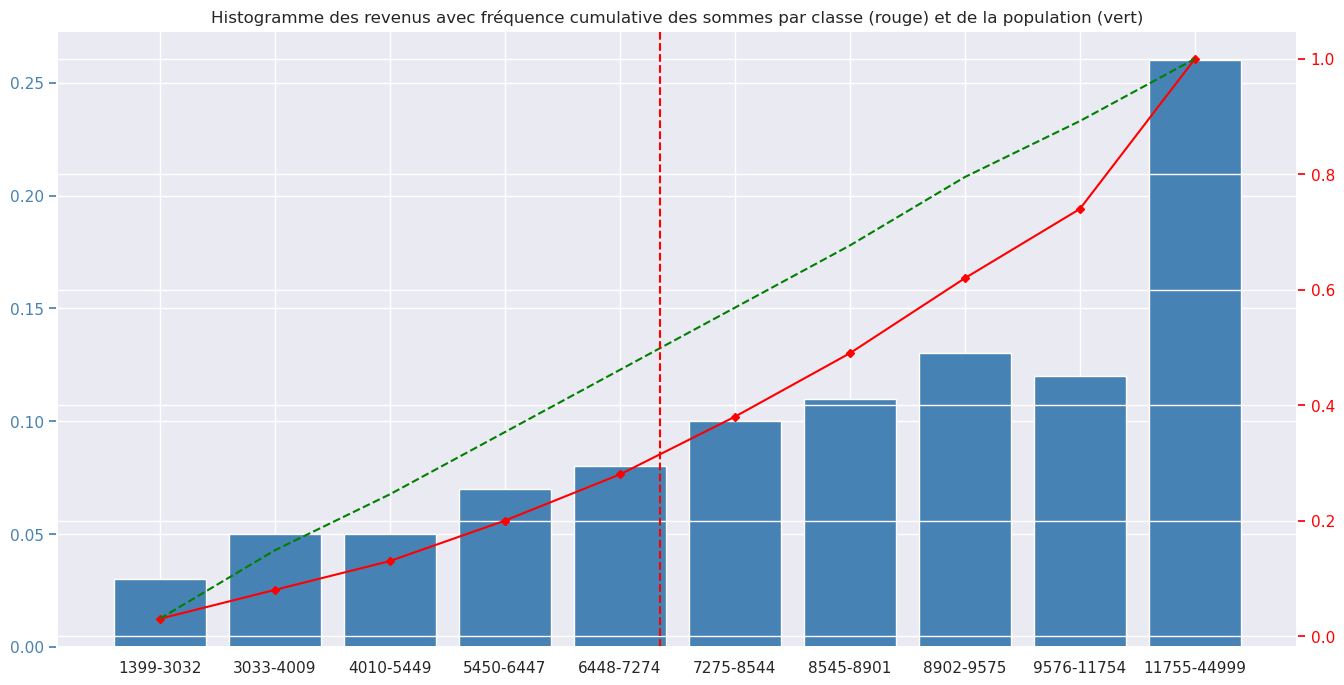

In [151]:
### Pareto distribution
# https://www.statology.org/pareto-chart-python/


df = df_merged 

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df.index, df['frequence_somme'], color=color1)

plt.title('Histogramme des revenus avec fréquence cumulative des sommes par classe (rouge) et de la population (vert)')

plt.gcf().set_size_inches(16, 8)
#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df['frequence_somme_cumulee'], color=color2, marker="D", ms=line_size)
# ax2.yaxis.set_major_formatter(PercentFormatter())

ax3 = ax.twinx()
ax3.plot(df.index, df['frequence_cumulee'], color='green', linestyle='dashed')

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
# cacher les valeurs de cette variable
ax3.set_yticks([])

plt.axvline(x=4.35, color='red', linestyle='--')

#display Pareto chart
plt.show()

#### Commentaire du graphique

On note que l'accroissement de la richesse ne suit pas celui de la population:
* à la médiane de la population (indiquée par la ligne vertical rouge qui indique les 50% de la fréquence cumulée) on n'a atteint qu'autour de 30% des salaires cumulés 
* les 20 % les plus riches de la population accumulent presque 40 % des revenus